# **The Shift in World's Energy Mix: Carbon Emissions from Conventional to Renewable Sources, 1962 - 2022**

### **Mirai Suchayla - Data Analyst**

## **Background**

The **world’s energy demand** continues to rise, while the **environmental impacts** follow a linear trend. In fact, the oil crisis in 70 century led US, Europe, and other regions to find a replacement for its energy sources. In an effort to meet this **growing demand** while **reducing emissions**, countries are investing heavily in **renewable energy** generation. It remains a learning curve, one that is still ongoing and continuously developing. 

### **-Kyoto Protocol ([1997](https://unfccc.int/process-and-meetings/the-kyoto-protocol))-**

Kyoto protocol is an International treaty under the [United Nations Framework Convention on Climate Change](https://unfccc.int/process-and-meetings/the-convention/what-is-the-united-nations-framework-convention-on-climate-change) (UNFCC) adopted in Kyoto, Japan, in December 1997. The protocol aimed to reduce greenhouse gases (GHG) emissions globally to combat climate change. link

### **-Paris Agreement ([2015](https://unfccc.int/process-and-meetings/the-paris-agreement))-**

Paris agreement adopted by 195 parties at the UN Climate Change Conference (COP21) in Paris, France, on 12 December 2015. It is legally binding treaty on climate change with commitment to hold “the increase in the global average temperature to well below 2°C above pre-industrial levels” and pursue efforts “to limit the temperature increase to 1.5°C above pre-industrial levels.”

Beyond these international agreements, the most economically efficient strategy for reducing greenhouse gas emissions, according to [Kenneth Gillingham and James H. Stock](https://pubs.aeaweb.org/doi/pdf/10.1257%2Fjep.32.4.53), is to reduce greenhouse gas emissions is to lower them to the point where the marginal benefits of reduction equal the marginal costs.

***So, is it truly worthwhile to invest in developing renewable energy and transitioning away from conventional energy sources?***

### -Objectives-

To uncover trends in renewable energy growth from 1970 onwards and assess its relationship with greenhouse gas emissions, providing insights into how energy transition policies have influenced emission outcomes over time.

Time frame = 1970 - 2023 (the last 5 decade)

In [2]:
import pandas as pd
import numpy as np
import http.client
import json

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)

# **A. Data Gathering**

Imported files
- Carbon Emission per Capita : X
- Energy Consumption : Y
- Countries Emission : Z

### **1. The Global Carbon Project's fossil CO2 emissions dataset**

In [3]:
# Carbon Emission per Capita
X = pd.read_csv('/Users/suchay/Documents/Suchay/Data Science/VS Coding/Capstone Project/Database/annual-co2-emissions-per-country/annual-co2-emissions-per-country.csv')
X

Entity Code  Year  Annual CO₂ emissions
0      Afghanistan  AFG  1949               14656.0
1      Afghanistan  AFG  1950               84272.0
2      Afghanistan  AFG  1951               91600.0
3      Afghanistan  AFG  1952               91600.0
4      Afghanistan  AFG  1953              106256.0
...            ...  ...   ...                   ...
29132     Zimbabwe  ZWE  2019            10262950.0
29133     Zimbabwe  ZWE  2020             8494503.0
29134     Zimbabwe  ZWE  2021            10203630.0
29135     Zimbabwe  ZWE  2022            10424940.0
29136     Zimbabwe  ZWE  2023            11164030.0

[29137 rows x 4 columns]

In [5]:
print("Number of unique country:", len(X['Entity'].unique()))
print("Number of unique country:", len(X['Code'].unique()))

Number of unique country: 247
Number of unique country: 218


There is 225 country with 221 codes, lets check whats behind

In [6]:
xnullcode = X[X['Code'].isna()]
xnullcode['Entity'].unique()

array(['Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
       'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'High-income countries', 'International aviation',
       'International shipping', 'Kuwaiti Oil Fires (GCP)',
       'Low-income countries', 'Lower-middle-income countries',
       'Middle East (GCP)', 'Non-OECD (GCP)', 'North America',
       'North America (GCP)', 'North America (excl. USA)', 'OECD (GCP)',
       'Oceania', 'Oceania (GCP)', 'Ryukyu Islands (GCP)',
       'South America', 'South America (GCP)',
       'Upper-middle-income countries'], dtype=object)

In [45]:
delete = [
    'Africa', 'Africa (GCP)', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Central America (GCP)', 'Europe',
       'Europe (GCP)', 'Europe (excl. EU-27)', 'Europe (excl. EU-28)',
       'European Union (27)', 'European Union (28)',
       'High-income countries', 'International aviation',
       'International shipping', 'Kuwaiti Oil Fires (GCP)',
       'Low-income countries', 'Lower-middle-income countries',
       'Middle East (GCP)', 'Non-OECD (GCP)', 'North America',
       'North America (GCP)', 'North America (excl. USA)', 'OECD (GCP)',
       'Oceania', 'Oceania (GCP)', 'Ryukyu Islands (GCP)',
       'South America', 'South America (GCP)',
       'Upper-middle-income countries', 'World'
]

X = X[~X['Entity'].isin(delete)]

In [46]:
X.head()

Entity Code  Year  Annual_CO2_emissions
21  Afghanistan  AFG  1970             1670397.0
22  Afghanistan  AFG  1971             1893554.0
23  Afghanistan  AFG  1972             1530347.0
24  Afghanistan  AFG  1973             1635454.0
25  Afghanistan  AFG  1974             1913152.0

In [47]:
X.dtypes

Entity                   object
Code                     object
Year                      int64
Annual_CO2_emissions    float64
dtype: object

In [48]:
X = X[(X['Year'] >= 1970) & (X['Year'] <= 2023)]

### **2. The Global Energy Consumption dataset**

In [101]:
Y = pd.read_csv('/Users/suchay/Documents/Suchay/Data Science/VS Coding/Capstone Project/Database/energy-data-master/owid-energy-data.csv')
Y.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  biofuel_electricity  biofuel_share_elec  \
0                      NaN                 5.87               1.550   
1                      NaN                 6.46               1.596   
2                      NaN                 6.62               1.528   
3                      NaN                 7.45               1.626   
4                      NaN                 8.40               1.692   

   biofuel_share_energy  carbon_intensity_elec  coal_cons_change_pct  \
0                   NaN                569.557                   NaN   
1                   NaN                567.642                   NaN   
2                   NaN                570.212                   NaN   
3                   NaN                574.699                   NaN   
4                   NaN                581.420                   NaN   

   coal_cons_change_twh  coal_cons_per_capita  coal_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   coal_elec_per_capita  coal_electricity  coal_prod_change_pct  \
0                   NaN             76.03                   NaN   
1                   NaN             86.26                   NaN   
2                   NaN             93.43                   NaN   
3                   NaN            102.01                   NaN   
4                   NaN            115.01                   NaN   

   coal_prod_change_twh  coal_prod_per_capita  coal_production  \
0                   NaN                   NaN              NaN   
1                   NaN                   NaN              NaN   
2                   NaN                   NaN              NaN   
3                   NaN                   NaN              NaN   
4                   NaN                   NaN              NaN   

   coal_share_elec  coal_share_energy  electricity_demand  \
0           20.081                NaN              378.61   
1           21.307                NaN              404.85   
2           21.568                NaN              433.19   
3           22.261                NaN              458.24   
4           23.161                NaN              496.56   

   electricity_demand_per_capita  electricity_generation  \
0                            NaN                  378.61   
1                            NaN                  404.85   
2                            NaN                  433.19   
3                            NaN                  458.24   
4                            NaN                  496.56   

   electricity_share_energy  energy_cons_change_pct  energy_cons_change_twh  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN          

In [102]:
ynullcode = Y[Y['iso_code'].isna()]
ynullcode.head()

country  year iso_code  population  gdp  biofuel_cons_change_pct  \
0  ASEAN (Ember)  2000      NaN         NaN  NaN                      NaN   
1  ASEAN (Ember)  2001      NaN         NaN  NaN                      NaN   
2  ASEAN (Ember)  2002      NaN         NaN  NaN                      NaN   
3  ASEAN (Ember)  2003      NaN         NaN  NaN                      NaN   
4  ASEAN (Ember)  2004      NaN         NaN  NaN                      NaN   

   biofuel_cons_change_twh  biofuel_cons_per_capita  biofuel_consumption  \
0                      NaN                      NaN                  NaN   
1                      NaN                      NaN                  NaN   
2                      NaN                      NaN                  NaN   
3                      NaN                      NaN                  NaN   
4                      NaN                      NaN                  NaN   

   biofuel_elec_per_capita  biofuel_electricity  biofuel_share_elec  \
0                      NaN                 5.87               1.550   
1                      NaN                 6.46               1.596   
2                      NaN                 6.62               1.528   
3                      NaN                 7.45               1.626   
4                      NaN                 8.40               1.692   

   biofuel_share_energy  carbon_intensity_elec  coal_cons_change_pct  \
0                   NaN                569.557                   NaN   
1                   NaN                567.642                   NaN   
2                   NaN                570.212                   NaN   
3                   NaN                574.699                   NaN   
4                   NaN                581.420                   NaN   

   coal_cons_change_twh  coal_cons_per_capita  coal_consumption  \
0                   NaN                   NaN               NaN   
1                   NaN                   NaN               NaN   
2                   NaN                   NaN               NaN   
3                   NaN                   NaN               NaN   
4                   NaN                   NaN               NaN   

   coal_elec_per_capita  coal_electricity  coal_prod_change_pct  \
0                   NaN             76.03                   NaN   
1                   NaN             86.26                   NaN   
2                   NaN             93.43                   NaN   
3                   NaN            102.01                   NaN   
4                   NaN            115.01                   NaN   

   coal_prod_change_twh  coal_prod_per_capita  coal_production  \
0                   NaN                   NaN              NaN   
1                   NaN                   NaN              NaN   
2                   NaN                   NaN              NaN   
3                   NaN                   NaN              NaN   
4                   NaN                   NaN              NaN   

   coal_share_elec  coal_share_energy  electricity_demand  \
0           20.081                NaN              378.61   
1           21.307                NaN              404.85   
2           21.568                NaN              433.19   
3           22.261                NaN              458.24   
4           23.161                NaN              496.56   

   electricity_demand_per_capita  electricity_generation  \
0                            NaN                  378.61   
1                            NaN                  404.85   
2                            NaN                  433.19   
3                            NaN                  458.24   
4                            NaN                  496.56   

   electricity_share_energy  energy_cons_change_pct  energy_cons_change_twh  \
0                       NaN                     NaN                     NaN   
1                       NaN                     NaN                     NaN   
2                       NaN                     NaN          

In [103]:
ynullcode['country'].unique()

array(['ASEAN (Ember)', 'Africa', 'Africa (EI)', 'Africa (EIA)',
       'Africa (Ember)', 'Africa (Shift)', 'Asia', 'Asia & Oceania (EIA)',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Asia and Oceania (Shift)',
       'Australia and New Zealand (EIA)', 'CIS (EI)',
       'Central & South America (EIA)', 'Central America (EI)',
       'Central and South America (Shift)', 'Czechoslovakia',
       'EU28 (Shift)', 'East Germany', 'Eastern Africa (EI)',
       'Eurasia (EIA)', 'Eurasia (Shift)', 'Europe', 'Europe (EI)',
       'Europe (EIA)', 'Europe (Ember)', 'Europe (Shift)',
       'European Union (27)', 'G20 (Ember)', 'G7 (Ember)',
       'High-income countries', 'Kosovo',
       'Latin America and Caribbean (Ember)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle Africa (EI)',
       'Middle East (EI)', 'Middle East (EIA)', 'Middle East (Ember)',
       'Middle East (Shift)', 'Non-OECD (EI)', 'Non-OECD (EIA)',
       'Non-OPEC (EI)', 'Non-OPEC (EIA)', 'North A

In [104]:
to_delete = [
    'ASEAN (Ember)', 'Africa', 'Africa (EI)', 'Africa (EIA)',
       'Africa (Ember)', 'Africa (Shift)', 'Asia', 'Asia & Oceania (EIA)',
       'Asia (Ember)', 'Asia Pacific (EI)', 'Asia and Oceania (Shift)',
       'Australia and New Zealand (EIA)', 'CIS (EI)',
       'Central & South America (EIA)', 'Central America (EI)',
       'Central and South America (Shift)', 'Czechoslovakia',
       'EU28 (Shift)', 'East Germany', 'Eastern Africa (EI)',
       'Eurasia (EIA)', 'Eurasia (Shift)', 'Europe', 'Europe (EI)',
       'Europe (EIA)', 'Europe (Ember)', 'Europe (Shift)',
       'European Union (27)', 'G20 (Ember)', 'G7 (Ember)',
       'High-income countries', 'Kosovo',
       'Latin America and Caribbean (Ember)', 'Low-income countries',
       'Lower-middle-income countries', 'Middle Africa (EI)',
       'Middle East (EI)', 'Middle East (EIA)', 'Middle East (Ember)',
       'Middle East (Shift)', 'Non-OECD (EI)', 'Non-OECD (EIA)',
       'Non-OPEC (EI)', 'Non-OPEC (EIA)', 'North America',
       'North America (EI)', 'North America (Ember)',
       'North America (Shift)', 'OECD (EI)', 'OECD (EIA)', 'OECD (Ember)',
       'OECD (Shift)', 'OPEC (EI)', 'OPEC (EIA)', 'OPEC (Shift)',
       'Oceania', 'Oceania (Ember)', 'Persian Gulf (EIA)',
       'Persian Gulf (Shift)', 'Serbia and Montenegro', 'South America',
       'South and Central America (EI)', 'U.S. Pacific Islands (EIA)',
       'U.S. Territories (EIA)', 'USSR',
       'United States Pacific Islands (Shift)',
       'United States Territories (Shift)',
       'Upper-middle-income countries', 'Wake Island (EIA)',
       'Wake Island (Shift)', 'West Germany', 'Western Africa (EI)',
       'World', 'Yugoslavia'
]

Y = Y[~Y['country'].isin(to_delete)]

In [105]:
Y.dtypes

country                    object
year                        int64
iso_code                   object
population                float64
gdp                       float64
                           ...   
wind_elec_per_capita      float64
wind_electricity          float64
wind_energy_per_capita    float64
wind_share_elec           float64
wind_share_energy         float64
Length: 130, dtype: object

In [106]:
Y.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'solar_share_elec', 'solar_share_energy', 'wind_cons_change_pct',
       'wind_cons_change_twh', 'wind_consumption', 'wind_elec_per_capita',
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy'],
      dtype='object', length=130)

In [108]:
# Add total of renewable energy and convention energy columns for filtering
Y['Renewable Energy Consumption'] = Y[
    ['biofuel_consumption', 'hydro_consumption', 'solar_consumption',
     'wind_consumption', 'renewables_consumption', 'other_renewable_consumption']
].sum(axis=1, skipna=True)

Y['Convention Energy Consumption'] = Y[
    ['coal_consumption', 'fossil_fuel_consumption', 'gas_consumption', 'oil_consumption']
].sum(axis=1, skipna=True)


Y['Renewable Energy Change Pct'] = Y[
    ['biofuel_cons_change_pct', 'hydro_cons_change_pct', 'solar_cons_change_pct',
     'wind_cons_change_pct', 'renewables_cons_change_pct', 'other_renewables_cons_change_pct']
].sum(axis=1, skipna=True)

Y['Convention Energy Change Pct'] = Y[
    ['coal_cons_change_pct', 'fossil_cons_change_pct', 'gas_cons_change_pct', 'oil_cons_change_pct']
].sum(axis=1, skipna=True)


Y['Renewable Energy Share'] = Y[
    ['biofuel_share_energy', 'hydro_share_energy', 'solar_share_energy',
     'wind_share_energy', 'renewables_share_energy', 'other_renewables_share_energy']
].sum(axis=1, skipna=True)

Y['Convention Energy Share'] = Y[
    ['coal_share_energy', 'fossil_share_energy', 'gas_share_energy', 'oil_share_energy']
].sum(axis=1, skipna=True)


In [109]:
Y = Y[(Y['year'] >= 1970) & (Y['year'] <= 2023)]

In [110]:
# Import data to excel
Y.to_csv('Global Energy Consumption.csv', index=False, encoding='utf-8')

### **3. Climate Trace API**

In [27]:
# Countries Emission
alpha3_codes = []
conn = http.client.HTTPSConnection('api.climatetrace.org')
conn.request('GET', '/v6/definitions/countries')
res = conn.getresponse()

countries_data = res.read()
countries = json.loads(countries_data.decode('utf-8'))

# Extract all alpha3 codes
alpha3_codes = [country['alpha3'] for country in countries]

# Create a dictionary for looping
countries_dict = {country['alpha3']: country for country in countries}

In [28]:
alphaString = ",".join(alpha3_codes)

# Request emissions data for all countries
conn2 = http.client.HTTPSConnection("api.climatetrace.org")
conn2.request("GET", f"/v6/country/emissions?countries={alphaString}")
res2 = conn2.getresponse()

emission_data = res2.read()
emissions = json.loads(emission_data.decode("utf-8"))

In [29]:
print(countries[0].keys())  # Check column name on countries data

dict_keys(['alpha3', 'alpha2', 'name', 'continent'])


In [30]:
print(emissions[0].keys())  # Check column name on emission data

dict_keys(['country', 'continent', 'rank', 'previousRank', 'assetCount', 'emissions', 'worldEmissions', 'emissionsChange'])


In [31]:
# Convert lists to DataFrames
df_countries = pd.DataFrame(countries)   

# If 'emissions' is a dict
if isinstance(emissions, dict):
    df_emissions = pd.DataFrame([emissions])   
else:
    df_emissions = pd.DataFrame(emissions)     

df_emissions = df_emissions.rename(columns={"country": "alpha3"})

# Merge
df_merged = pd.merge(df_emissions, df_countries, on="alpha3", how="left")

In [32]:
# Expand emissions dict
emissions_expanded = df_merged["emissions"].apply(pd.Series)
world_expanded = df_merged["worldEmissions"].apply(pd.Series)
change_expanded = df_merged["emissionsChange"].apply(pd.Series)

# Add suffixes
emissions_expanded = emissions_expanded.add_prefix("emissions_")
world_expanded = world_expanded.add_prefix("worldEmissions_")
change_expanded = change_expanded.add_prefix("emissionsChange_")

# Concatenate back to main dataframe
Z_clean = pd.concat(
    [df_merged.drop(["emissions", "worldEmissions", "emissionsChange"], axis=1),
     emissions_expanded, world_expanded, change_expanded],
    axis=1
)

In [33]:
Z = Z_clean 
Z

alpha3 continent_x  rank  previousRank assetCount alpha2  \
0      MDG        null   110             0       None     MG   
1      PLW        null   205             0       None     PW   
2      BMU        null   194             0       None     BM   
3      PSE        null   166             0       None     PS   
4      COG        null   119             0       None     CG   
..     ...         ...   ...           ...        ...    ...   
247    MNG        null    56             0       None     MN   
248    SMR        null   237             0       None     SM   
249    MEX        null    11             0       None     MX   
250    QAT        null    36             0       None     QA   
251    ETH        null    45             0       None     ET   

                   name    continent_y  emissions_co2  emissions_ch4  \
0            Madagascar         Africa   1.442721e+08   7.795612e+06   
1                 Palau        Oceania   6.838671e+06   1.102231e+04   
2               Bermuda  North America   1.025005e+07   1.225051e+04   
3    State of Palestine           Asia   4.497920e+07   2.918475e+05   
4                 Congo         Africa   1.612622e+08   5.041405e+06   
..                  ...            ...            ...            ...   
247            Mongolia           Asia   5.370029e+08   1.298726e+07   
248          San Marino         Europe   6.958916e+05   1.115123e+03   
249              Mexico  North America   6.204373e+09   8.154760e+07   
250               Qatar           Asia   2.379158e+09   1.842696e+07   
251            Ethiopia         Africa   4.744936e+08   3.653914e+07   

     emissions_n2o  emissions_co2e_100yr  emissions_co2e_20yr  \
0     1.629262e+05          4.090937e+08         8.298483e+08   
1     2.112442e+02          7.221169e+06         7.802045e+06   
2     2.745810e+02          1.065623e+07         1.130183e+07   
3     1.164026e+04          5.604427e+07         7.142463e+07   
4     1.752334e+04          3.183886e+08         5.881306e+08   
..             ...                   ...                  ...   
247   4.537777e+05          1.028453e+09         1.712881e+09   
248   1.177191e+02          7.594624e+05         8.182294e+05   
249   2.012463e+06          9.206867e+09         1.374176e+10   
250   2.964457e+04          2.964009e+09         3.969538e+09   
251   1.295971e+06          1.829215e+09         3.754839e+09   

     worldEmissions_co2  worldEmissions_ch4  worldEmissions_n2o  \
0          4.475352e+11        3.868929e+09        8.404421e+07   
1          4.475352e+11        3.868929e+09        8.404421e+07   
2          4.475352e+11        3.868929e+09        8.404421e+07   
3          4.475352e+11        3.868929e+09        8.404421e+07   
4          4.475352e+11        3.868929e+09        8.404421e+07   
..                  ...                 ...                 ...   
247        4.475352e+11        3.868929e+09        8.404421e+07   
248        4.475352e+11        3.868929e+09        8.404421e+07   
249        4.475352e+11        3.868929e+09        8.404421e+07   
250        4.475352e+11        3.868929e+09        8.404421e+07   
251        4.475352e+11        3.868929e+09        8.404421e+07   

     worldEmissions_co2e_100yr  worldEmissions_co2e_20yr emissionsChange_co2  \
0                 5.941174e+11              8.090490e+11                None   
1                 5.941174e+11              8.090490e+11                None   
2                 5.941174e+11              8.090490e+11                None   
3                 5.941174e+11              8.090490e+11                None   
4                 5.941174e+11              8.090490e+11                None   
..                         ...                       ...                 ...   
247               5.941174e+11              8.090490e+11                None   
248               5.941174e+11              8.090490e+11                None   
249               5.941174e+11              8.090490e+11        

In [34]:
# Create summaries column
Z['Total Emission'] = Z['emissions_co2'] + Z['emissions_ch4'] + Z['emissions_n2o']
Z['Total Emission (Billion)'] = Z['Total Emission'] / 1e9
Z['Total World Emission'] = Z['worldEmissions_co2'] + Z['worldEmissions_ch4'] + Z['worldEmissions_n2o']
Z['Worldwide Percentage'] = Z['Total Emission']/Z['Total World Emission']

In [ ]:
# Import data to excel
Z.to_excel("Gas Emission.xlsx", index=False)

All data required has been downloaded:

1. X -> The Global Carbon Project's fossil CO2 emissions dataset
2. Y -> The Global Energy Consumption dataset
3. Z -> Total gas emission dataset

# **B. Data Understanding**

### **Dataset Shape**

In [111]:
print("Dataset shape for X:", X.shape)
print("Dataset shape for Y:", Y.shape)
print("Dataset shape for Z:", Z.shape)

Dataset shape for X: (11346, 4)
Dataset shape for Y: (10322, 136)
Dataset shape for Z: (252, 27)


### **Data Correlation**

In [36]:
# Correlation of X dataset
display(X.describe().T, X.describe(include='object').T)

count          mean           std     min        25%  \
Year                  11400.0  1.996958e+03  1.551983e+01  1970.0    1984.00   
Annual CO₂ emissions  11400.0  2.424251e+08  1.929691e+09     0.0  670892.75   

                            50%         75%           max  
Year                     1997.0      2010.0  2.023000e+03  
Annual CO₂ emissions  6410526.5  47943009.0  3.779157e+10

count unique          top freq
Entity  11400    217  Afghanistan   54
Code    11400    217          AFG   54

In [112]:
# Correlation of Y dataset
display(Y.describe().T, Y.describe(include='object').T)

count          mean           std  \
year                           10322.0  1.998965e+03  1.436113e+01   
population                     10242.0  3.020947e+07  1.185899e+08   
gdp                             7840.0  4.121786e+11  1.477145e+12   
biofuel_cons_change_pct         1087.0  6.314997e+01  3.381449e+02   
biofuel_cons_change_twh         1748.0  7.331133e-01  4.313116e+00   
...                                ...           ...           ...   
Convention Energy Consumption  10322.0  9.252934e+02  4.314742e+03   
Renewable Energy Change Pct    10322.0  8.868669e+01  2.729823e+03   
Convention Energy Change Pct   10322.0  2.051688e+01  6.306006e+02   
Renewable Energy Share         10322.0  7.187213e+00  1.811850e+01   
Convention Energy Share        10322.0  5.347999e+01  8.042245e+01   

                                        min           25%           50%  \
year                           1.970000e+03  1.987000e+03  1.999000e+03   
population                     1.833000e+03  7.429608e+05  5.719216e+06   
gdp                            1.642060e+08  1.637908e+10  5.640177e+10   
biofuel_cons_change_pct       -1.000000e+02 -1.516500e+00  8.261000e+00   
biofuel_cons_change_twh       -3.754900e+01  0.000000e+00  0.000000e+00   
...                                     ...           ...           ...   
Convention Energy Consumption  0.000000e+00  0.000000e+00  0.000000e+00   
Renewable Energy Change Pct   -1.852820e+02  0.000000e+00  0.000000e+00   
Convention Energy Change Pct  -1.822720e+02  0.000000e+00  0.000000e+00   
Renewable Energy Share         0.000000e+00  0.000000e+00  0.000000e+00   
Convention Energy Share        0.000000e+00  0.000000e+00  0.000000e+00   

                                        75%           max  
year                           2.011000e+03  2.023000e+03  
population                     1.904374e+07  1.428628e+09  
gdp                            2.394690e+11  2.696602e+13  
biofuel_cons_change_pct        3.027900e+01  5.659328e+03  
biofuel_cons_change_twh        2.555000e-01  6.087500e+01  
...                                     ...           ...  
Convention Energy Consumption  3.508370e+02  7.735482e+04  
Renewable Energy Change Pct    6.289500e+00  2.450964e+05  
Convention Energy Change Pct   9.567500e-01  5.753523e+04  
Renewable Energy Share         3.139500e+00  1.486040e+02  
Convention Energy Share        1.486577e+02  2.000010e+02  

[134 rows x 8 columns]

count unique       top freq
country   10322    220  Zimbabwe   54
iso_code  10322    220       ZWE   54

In [38]:
# Correlation of Z dataset
display(Z.describe().T, Z.describe(include='object').T)

count          mean           std           min  \
rank                       252.0  1.264960e+02  7.288350e+01  1.000000e+00   
previousRank               252.0  0.000000e+00  0.000000e+00  0.000000e+00   
emissions_co2              252.0  1.775933e+09  9.412731e+09  0.000000e+00   
emissions_ch4              252.0  1.535289e+07  5.921178e+07  0.000000e+00   
emissions_n2o              252.0  3.335088e+05  1.156476e+06  0.000000e+00   
emissions_co2e_100yr       252.0  2.357609e+09  1.166414e+10  0.000000e+00   
emissions_co2e_20yr        252.0  3.210512e+09  1.488395e+10  0.000000e+00   
worldEmissions_co2         252.0  4.475352e+11  1.651229e-03  4.475352e+11   
worldEmissions_ch4         252.0  3.868929e+09  1.194465e-05  3.868929e+09   
worldEmissions_n2o         252.0  8.404421e+07  1.941006e-07  8.404421e+07   
worldEmissions_co2e_100yr  252.0  5.941174e+11  1.590072e-03  5.941174e+11   
worldEmissions_co2e_20yr   252.0  8.090490e+11  2.079325e-03  8.090490e+11   
Total Emission             252.0  1.791620e+09  9.470342e+09  0.000000e+00   
Total Emission (Billion)   252.0  1.791620e+00  9.470342e+00  0.000000e+00   
Total World Emission       252.0  4.514882e+11  9.785059e-04  4.514882e+11   
Worldwide Percentage       252.0  3.968254e-03  2.097584e-02  0.000000e+00   

                                    25%           50%           75%  \
rank                       6.375000e+01  1.265000e+02  1.892500e+02   
previousRank               0.000000e+00  0.000000e+00  0.000000e+00   
emissions_co2              1.252176e+07  1.349779e+08  7.205564e+08   
emissions_ch4              3.411893e+04  1.924697e+06  8.607980e+06   
emissions_n2o              6.597959e+02  4.307211e+04  2.146467e+05   
emissions_co2e_100yr       1.357279e+07  2.430049e+08  9.681266e+08   
emissions_co2e_20yr        1.600456e+07  3.771379e+08  1.600320e+09   
worldEmissions_co2         4.475352e+11  4.475352e+11  4.475352e+11   
worldEmissions_ch4         3.868929e+09  3.868929e+09  3.868929e+09   
worldEmissions_n2o         8.404421e+07  8.404421e+07  8.404421e+07   
worldEmissions_co2e_100yr  5.941174e+11  5.941174e+11  5.941174e+11   
worldEmissions_co2e_20yr   8.090490e+11  8.090490e+11  8.090490e+11   
Total Emission             1.253908e+07  1.360967e+08  7.243117e+08   
Total Emission (Billion)   1.253908e-02  1.360967e-01  7.243117e-01   
Total World Emission       4.514882e+11  4.514882e+11  4.514882e+11   
Worldwide Percentage       2.777278e-05  3.014401e-04  1.604276e-03   

                                    max  
rank                       2.510000e+02  
previousRank               0.000000e+00  
emissions_co2              1.329915e+11  
emissions_ch4              7.669788e+08  
emissions_n2o              1.337643e+07  
emissions_co2e_100yr       1.634215e+11  
emissions_co2e_20yr        2.060274e+11  
worldEmissions_co2         4.475352e+11  
worldEmissions_ch4         3.868929e+09  
worldEmissions_n2o         8.404421e+07  
worldEmissions_co2e_100yr  5.941174e+11  
worldEmissions_co2e_20yr   8.090490e+11  
Total Emission             1.337719e+11  
Total Emission (Billion)   1.337719e+02  
Total World Emission       4.514882e+11  
Worldwide Percentage       2.962910e-01

count unique         top freq
alpha3                       252    252         MDG    1
continent_x                  252      1        null  252
assetCount                     0      0         NaN  NaN
alpha2                       252    252          MG    1
name                         252    252  Madagascar    1
continent_y                  252      8      Africa   59
emissionsChange_co2            0      0         NaN  NaN
emissionsChange_ch4            0      0         NaN  NaN
emissionsChange_n2o            0      0         NaN  NaN
emissionsChange_co2e_100yr     0      0         NaN  NaN
emissionsChange_co2e_20yr      0      0         NaN  NaN

### **Data selection**

The project goals is to understand trend of top 5 renewable energy usage countries. Hence, the data will be minimize and focused on targeted dataset 

### **X dataset data recognition**

In [39]:
X.dtypes

Entity                   object
Code                     object
Year                      int64
Annual CO₂ emissions    float64
dtype: object

In [40]:
X.columns

Index(['Entity', 'Code', 'Year', 'Annual CO₂ emissions'], dtype='object')

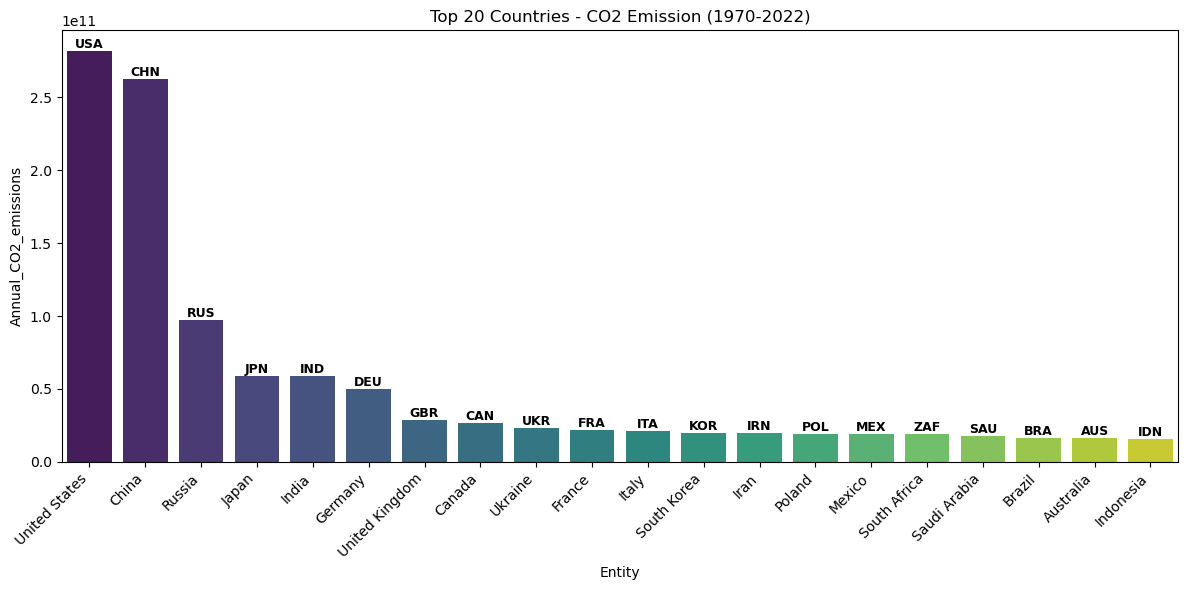

In [49]:
# Rename column first (to avoid the Unicode subscript issue)
#X = X.rename(columns={'Annual CO₂ emissions': 'Annual_CO2_emissions'})

# Group by Country, sum total across years
country_sum = X.groupby(['Entity', 'Code'], as_index=False)['Annual_CO2_emissions'].sum()

# Get top 20 countries
top20 = country_sum.nlargest(20, 'Annual_CO2_emissions').sort_values('Annual_CO2_emissions', ascending=False)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=top20, x='Entity', y='Annual_CO2_emissions', palette='viridis')

# Add labels (Code)
for i, row in enumerate(top20.itertuples()):
    plt.text(i, row.Annual_CO2_emissions, row.Code, ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

plt.title('Top 20 Countries - CO2 Emission (1970-2022)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Notes : 'Theese are the top 20 country which has the highest Carbon Emission

### **Y dataset data recognition**

In [113]:
Y.dtypes

country                           object
year                               int64
iso_code                          object
population                       float64
gdp                              float64
                                  ...   
Convention Energy Consumption    float64
Renewable Energy Change Pct      float64
Convention Energy Change Pct     float64
Renewable Energy Share           float64
Convention Energy Share          float64
Length: 136, dtype: object

In [114]:
Y.columns

Index(['country', 'year', 'iso_code', 'population', 'gdp',
       'biofuel_cons_change_pct', 'biofuel_cons_change_twh',
       'biofuel_cons_per_capita', 'biofuel_consumption',
       'biofuel_elec_per_capita',
       ...
       'wind_electricity', 'wind_energy_per_capita', 'wind_share_elec',
       'wind_share_energy', 'Renewable Energy Consumption',
       'Convention Energy Consumption', 'Renewable Energy Change Pct',
       'Convention Energy Change Pct', 'Renewable Energy Share',
       'Convention Energy Share'],
      dtype='object', length=136)

In [115]:
Y.head()

country  year iso_code  population           gdp  \
94  Afghanistan  1970      AFG  10752973.0  1.581223e+10   
95  Afghanistan  1971      AFG  11015853.0  1.577051e+10   
96  Afghanistan  1972      AFG  11286753.0  1.317055e+10   
97  Afghanistan  1973      AFG  11575308.0  1.356863e+10   
98  Afghanistan  1974      AFG  11869881.0  1.430911e+10   

    biofuel_cons_change_pct  biofuel_cons_change_twh  biofuel_cons_per_capita  \
94                      NaN                      NaN                      NaN   
95                      NaN                      NaN                      NaN   
96                      NaN                      NaN                      NaN   
97                      NaN                      NaN                      NaN   
98                      NaN                      NaN                      NaN   

    biofuel_consumption  biofuel_elec_per_capita  biofuel_electricity  \
94                  NaN                      NaN                  NaN   
95                  NaN                      NaN                  NaN   
96                  NaN                      NaN                  NaN   
97                  NaN                      NaN                  NaN   
98                  NaN                      NaN                  NaN   

    biofuel_share_elec  biofuel_share_energy  carbon_intensity_elec  \
94                 NaN                   NaN                    NaN   
95                 NaN                   NaN                    NaN   
96                 NaN                   NaN                    NaN   
97                 NaN                   NaN                    NaN   
98                 NaN                   NaN                    NaN   

    coal_cons_change_pct  coal_cons_change_twh  coal_cons_per_capita  \
94                   NaN                   NaN                   NaN   
95                   NaN                   NaN                   NaN   
96                   NaN                   NaN                   NaN   
97                   NaN                   NaN                   NaN   
98                   NaN                   NaN                   NaN   

    coal_consumption  coal_elec_per_capita  coal_electricity  \
94               NaN                   NaN               NaN   
95               NaN                   NaN               NaN   
96               NaN                   NaN               NaN   
97               NaN                   NaN               NaN   
98               NaN                   NaN               NaN   

    coal_prod_change_pct  coal_prod_change_twh  coal_prod_per_capita  \
94                20.588                 0.228               124.163   
95               -17.683                -0.236                99.768   
96               -47.407                -0.521                51.211   
97                64.789                 0.374                82.287   
98                -1.709                -0.016                78.873   

    coal_production  coal_share_elec  coal_share_energy  electricity_demand  \
94            1.335              NaN                NaN                 NaN   
95            1.099              NaN                NaN                 NaN   
96            0.578              NaN                NaN                 NaN   
97            0.952              NaN                NaN                 NaN   
98            0.936              NaN                NaN                 NaN   

    electricity_demand_per_capita  electricity_generation  \
94                            NaN                     NaN   
95                            NaN                     NaN   
96                            NaN                     NaN   
97                            NaN                     NaN   
98                            NaN                     NaN   

    electricity_share_energy  energy_cons_change_pct  energy_cons_change_twh  \
94                       NaN                     NaN                     NaN   
95                       NaN             

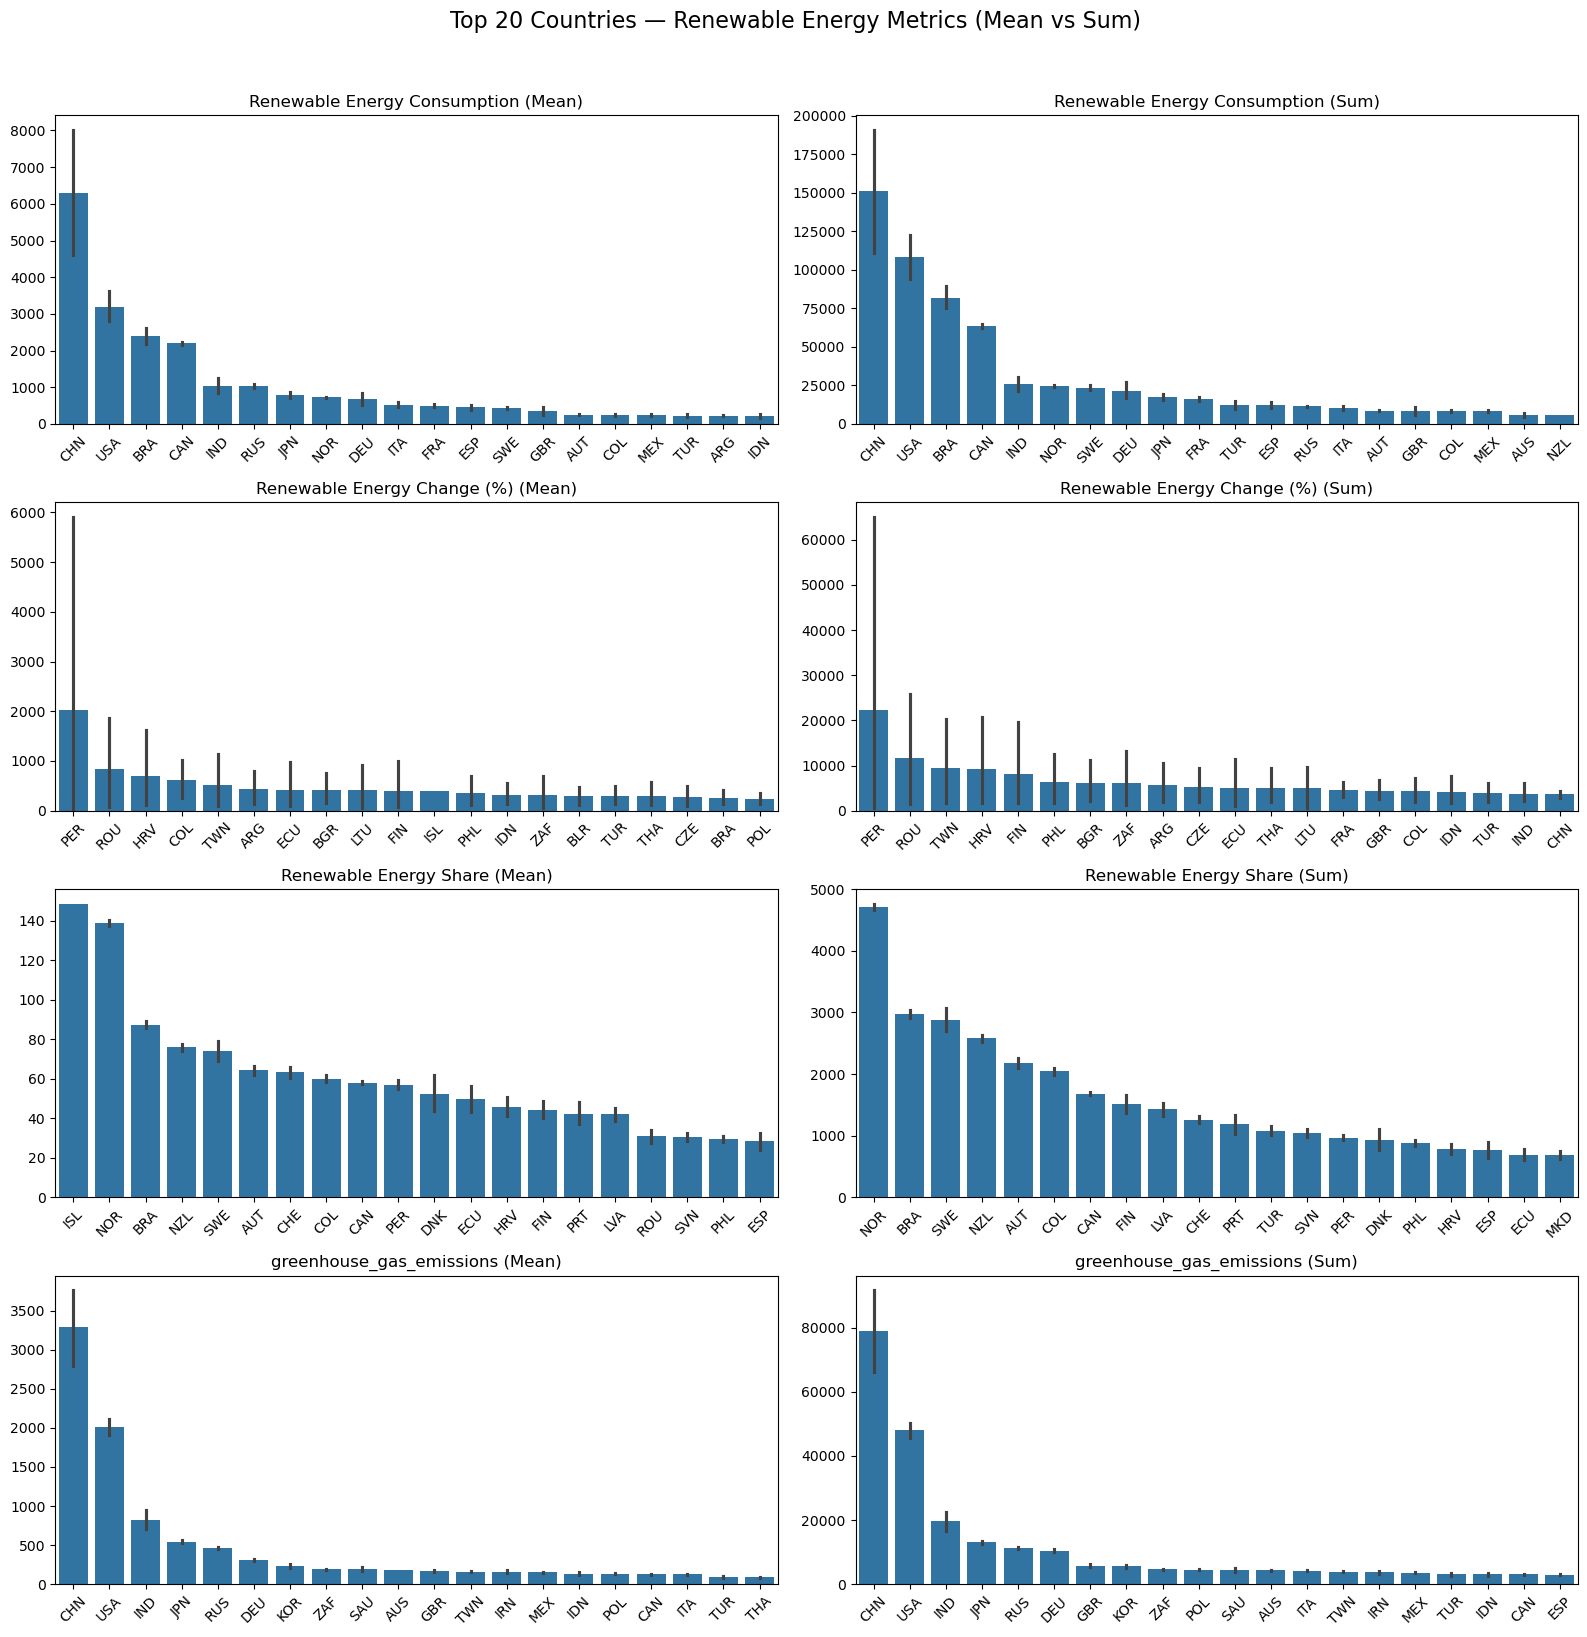

In [56]:
# Define metrics and their display names
metrics = [
    ('Renewable Energy Consumption', 'Renewable Energy Consumption'),
    ('Renewable Energy Change Pct', 'Renewable Energy Change (%)'),
    ('Renewable Energy Share', 'Renewable Energy Share'),
    ('greenhouse_gas_emissions', 'greenhouse_gas_emissions')
]

# Create figure and axes (3 rows x 2 columns)
fig, axes = plt.subplots(4, 2, figsize=(16, 16))
fig.suptitle('Top 20 Countries — Renewable Energy Metrics (Mean vs Sum)', fontsize=16, y=1.02)

for i, (col, title) in enumerate(metrics):
    # --- Mean ---
    top_countries_mean = (
        Y.groupby('iso_code')[col]
        .mean()
        .sort_values(ascending=False)
        .head(20)
        .index
    )

    sns.barplot(
        data=Y[Y['iso_code'].isin(top_countries_mean)],
        x='iso_code', y=col, estimator=np.mean,
        order=top_countries_mean, ax=axes[i, 0]
    )
    axes[i, 0].set_title(f'{title} (Mean)')
    axes[i, 0].set_xlabel('')
    axes[i, 0].set_ylabel('')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # --- Sum ---
    top_countries_sum = (
        Y.groupby('iso_code')[col]
        .sum()
        .sort_values(ascending=False)
        .head(20)
        .index
    )

    sns.barplot(
        data=Y[Y['iso_code'].isin(top_countries_sum)],
        x='iso_code', y=col, estimator=np.sum,
        order=top_countries_sum, ax=axes[i, 1]
    )
    axes[i, 1].set_title(f'{title} (Sum)')
    axes[i, 1].set_xlabel('')
    axes[i, 1].set_ylabel('')
    axes[i, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


year                               0
Renewable Energy Consumption    8604
dtype: int64


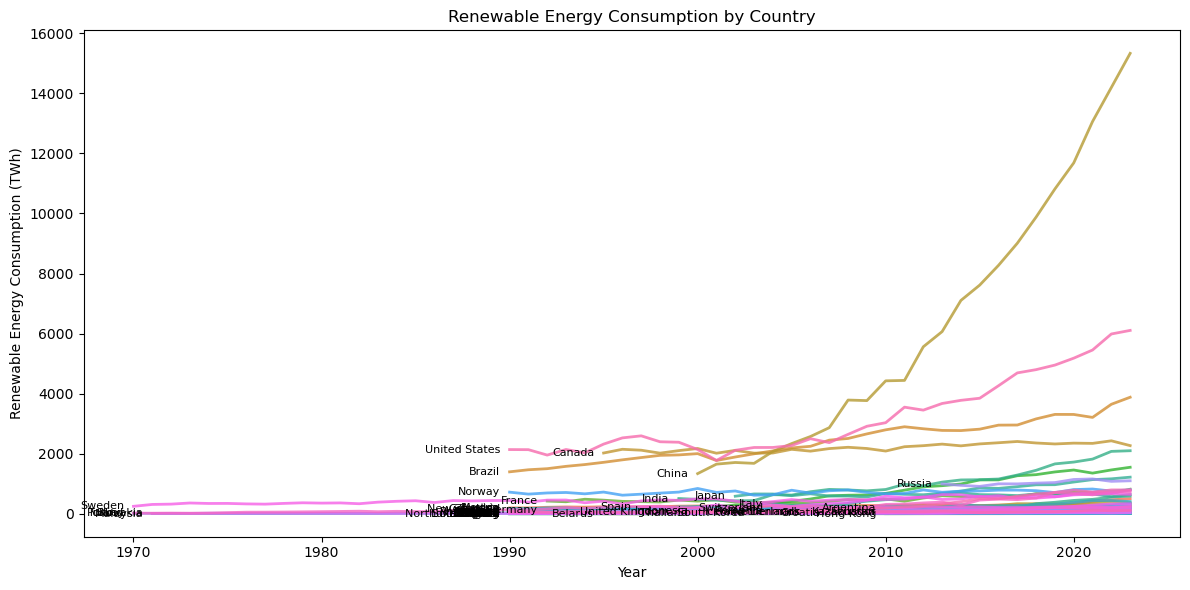

In [ ]:
# Optional check
print(Y[['year', 'Renewable Energy Consumption']].isna().sum())

# === PLOT LINE CHART ===
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=Y,
    x='year',
    y='Renewable Energy Consumption',
    hue='country',
    linewidth=2,
    alpha=0.8
)

# === ADD LABELS ON LEFT SIDE ===
for country, data_country in Y.groupby('country'):
    data_country = data_country.dropna(subset=['year', 'Renewable Energy Consumption'])
    if data_country.empty:
        continue

    first_point = data_country.sort_values('year').iloc[0]
    plt.text(
        first_point['year'] - 0.5, 
        first_point['Renewable Energy Consumption'],
        country,
        fontsize=8,
        va='center',
        ha='right'
    )

# === FINAL STYLE ===
plt.title("Renewable Energy Consumption by Country")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Consumption (TWh)")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


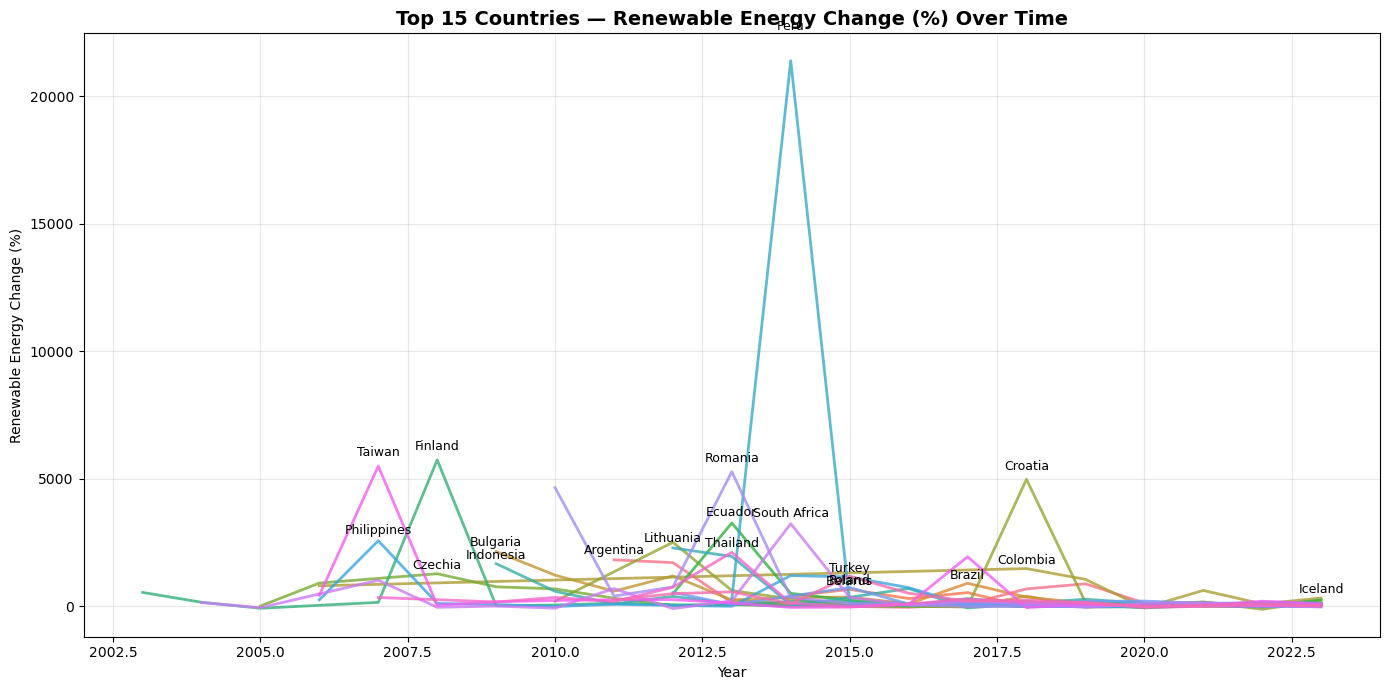

In [58]:
# === SELECT TOP 20 COUNTRIES BY AVERAGE RENEWABLE CHANGE PCT ===
top_countries = (
    Y.groupby('country')['Renewable Energy Change Pct']
    .mean()
    .sort_values(ascending=False)
    .head(20)
    .index
)
df_top = Y[Y['country'].isin(top_countries)]

# === PLOT LINE CHART ===
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=df_top,
    x='year',
    y='Renewable Energy Change Pct',
    hue='country',
    linewidth=2,
    alpha=0.8
)

# === ADD LABELS AT HIGHEST POINT FOR EACH COUNTRY ===
for country, data_country in df_top.groupby('country'):
    data_country = data_country.dropna(subset=['year', 'Renewable Energy Change Pct'])
    if data_country.empty:
        continue

    max_point = data_country.loc[data_country['Renewable Energy Change Pct'].idxmax()]

    # Offset label slightly upward to prevent overlap
    plt.text(
        max_point['year'],
        max_point['Renewable Energy Change Pct'] + 0.05 * data_country['Renewable Energy Change Pct'].max(),
        country,
        fontsize=9,
        va='bottom',
        ha='center'
    )

# === STYLE ===
plt.title("Top 15 Countries — Renewable Energy Change (%) Over Time", fontsize=14, weight='bold')
plt.xlabel("Year")
plt.ylabel("Renewable Energy Change (%)")
plt.legend([], [], frameon=False)  # hide legend, since labels are already on chart
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


year                         0
Renewable Energy Share    8668
dtype: int64


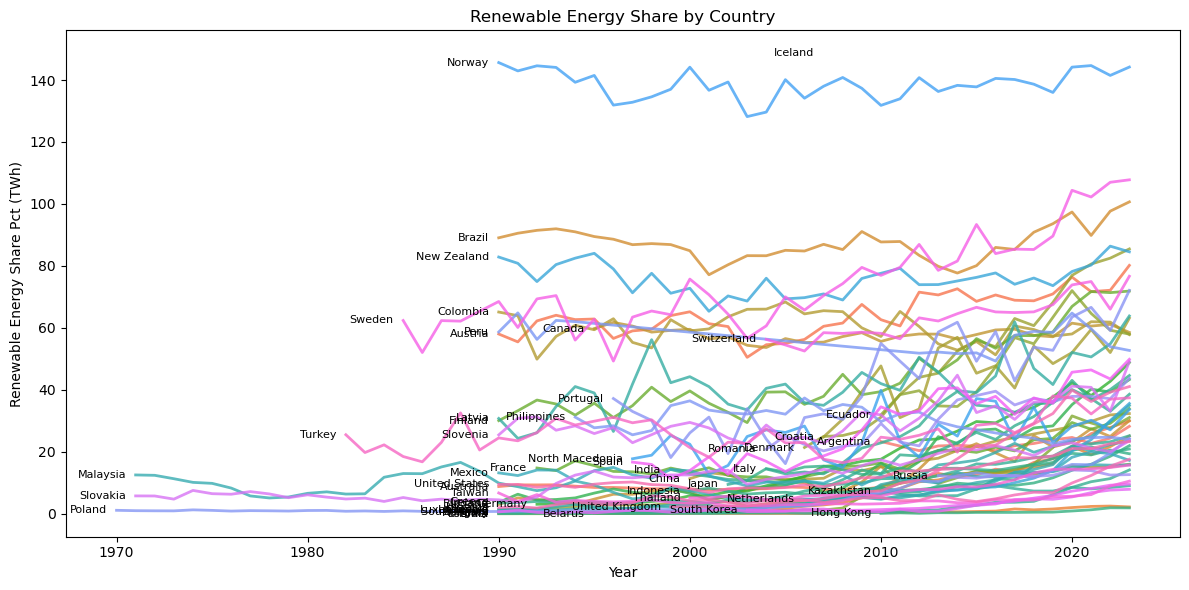

In [59]:
# Optional check
print(Y[['year', 'Renewable Energy Share']].isna().sum())

# === PLOT LINE CHART ===
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=Y,
    x='year',
    y='Renewable Energy Share',
    hue='country',
    linewidth=2,
    alpha=0.8
)

# === ADD LABELS ON LEFT SIDE ===
for country, data_country in Y.groupby('country'):
    data_country = data_country.dropna(subset=['year', 'Renewable Energy Share'])
    if data_country.empty:
        continue

    first_point = data_country.sort_values('year').iloc[0]
    plt.text(
        first_point['year'] - 0.5, 
        first_point['Renewable Energy Share'],
        country,
        fontsize=8,
        va='center',
        ha='right'
    )

# === FINAL STYLE ===
plt.title("Renewable Energy Share by Country")
plt.xlabel("Year")
plt.ylabel("Renewable Energy Share Pct (TWh)")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


year                           0
greenhouse_gas_emissions    5024
dtype: int64


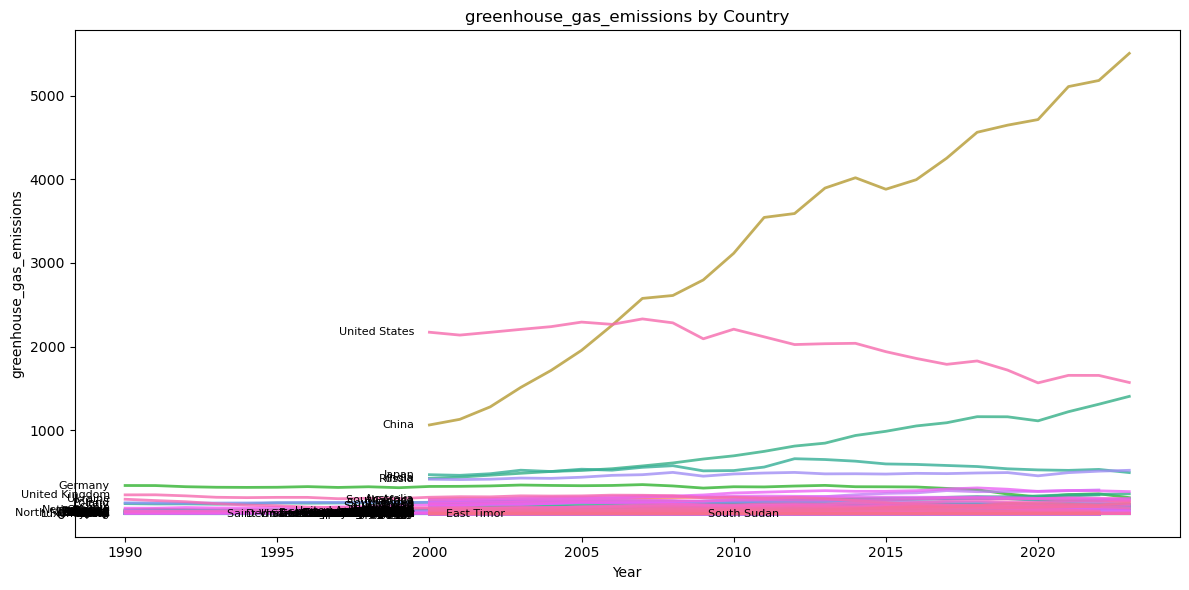

In [60]:
# Optional check
print(Y[['year', 'greenhouse_gas_emissions']].isna().sum())

# === PLOT LINE CHART ===
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=Y,
    x='year',
    y='greenhouse_gas_emissions',
    hue='country',
    linewidth=2,
    alpha=0.8
)

# === ADD LABELS ON LEFT SIDE ===
for country, data_country in Y.groupby('country'):
    data_country = data_country.dropna(subset=['year', 'greenhouse_gas_emissions'])
    if data_country.empty:
        continue

    first_point = data_country.sort_values('year').iloc[0]
    plt.text(
        first_point['year'] - 0.5, 
        first_point['greenhouse_gas_emissions'],
        country,
        fontsize=8,
        va='center',
        ha='right'
    )

# === FINAL STYLE ===
plt.title("greenhouse_gas_emissions by Country")
plt.xlabel("Year")
plt.ylabel("greenhouse_gas_emissions")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.show()


In [62]:
(Y[Y['year'] == 2023].groupby('country')['Renewable Energy Consumption'].sum().sort_values(ascending=False).reset_index()).head()

country  Renewable Energy Consumption
0          China                     15333.047
1  United States                      6105.127
2         Brazil                      3879.257
3         Canada                      2267.829
4          India                      2097.434

In [63]:
(Y[Y['year'] == 2023].groupby('country')['Renewable Energy Change Pct'].sum().sort_values(ascending=False).reset_index()).head()

country  Renewable Energy Change Pct
0  North Macedonia                      418.054
1          Iceland                      405.603
2         Colombia                      328.629
3          Ireland                      264.746
4          Ecuador                      251.929

In [64]:
(Y[Y['year'] == 2023].groupby('country')['Renewable Energy Share'].sum().sort_values(ascending=False).reset_index()).head()

country  Renewable Energy Share
0       Norway                 144.182
1       Sweden                 107.781
2       Brazil                 100.662
3      Denmark                  85.470
4  New Zealand                  84.534

In [65]:
(Y[Y['year'] == 2023].groupby('country')['greenhouse_gas_emissions'].sum().sort_values(ascending=False).reset_index()).head()

country  greenhouse_gas_emissions
0          China                   5508.48
1  United States                   1569.91
2          India                   1403.98
3         Russia                    519.31
4          Japan                    491.95

### **Z dataset data recognition**

In [66]:
Z.dtypes

alpha3                         object
continent_x                    object
rank                            int64
previousRank                    int64
assetCount                     object
alpha2                         object
name                           object
continent_y                    object
emissions_co2                 float64
emissions_ch4                 float64
emissions_n2o                 float64
emissions_co2e_100yr          float64
emissions_co2e_20yr           float64
worldEmissions_co2            float64
worldEmissions_ch4            float64
worldEmissions_n2o            float64
worldEmissions_co2e_100yr     float64
worldEmissions_co2e_20yr      float64
emissionsChange_co2            object
emissionsChange_ch4            object
emissionsChange_n2o            object
emissionsChange_co2e_100yr     object
emissionsChange_co2e_20yr      object
Total Emission                float64
Total Emission (Billion)      float64
Total World Emission          float64
Worldwide Pe

In [67]:
Z.columns

Index(['alpha3', 'continent_x', 'rank', 'previousRank', 'assetCount', 'alpha2',
       'name', 'continent_y', 'emissions_co2', 'emissions_ch4',
       'emissions_n2o', 'emissions_co2e_100yr', 'emissions_co2e_20yr',
       'worldEmissions_co2', 'worldEmissions_ch4', 'worldEmissions_n2o',
       'worldEmissions_co2e_100yr', 'worldEmissions_co2e_20yr',
       'emissionsChange_co2', 'emissionsChange_ch4', 'emissionsChange_n2o',
       'emissionsChange_co2e_100yr', 'emissionsChange_co2e_20yr',
       'Total Emission', 'Total Emission (Billion)', 'Total World Emission',
       'Worldwide Percentage'],
      dtype='object')

In [68]:
Z.head()

alpha3 continent_x  rank  previousRank assetCount alpha2  \
0    MDG        null   110             0       None     MG   
1    PLW        null   205             0       None     PW   
2    BMU        null   194             0       None     BM   
3    PSE        null   166             0       None     PS   
4    COG        null   119             0       None     CG   

                 name    continent_y  emissions_co2  emissions_ch4  \
0          Madagascar         Africa   1.442721e+08   7.795612e+06   
1               Palau        Oceania   6.838671e+06   1.102231e+04   
2             Bermuda  North America   1.025005e+07   1.225051e+04   
3  State of Palestine           Asia   4.497920e+07   2.918475e+05   
4               Congo         Africa   1.612622e+08   5.041405e+06   

   emissions_n2o  emissions_co2e_100yr  emissions_co2e_20yr  \
0  162926.182258          4.090937e+08         8.298483e+08   
1     211.244245          7.221169e+06         7.802045e+06   
2     274.580995          1.065623e+07         1.130183e+07   
3   11640.257752          5.604427e+07         7.142463e+07   
4   17523.339331          3.183886e+08         5.881306e+08   

   worldEmissions_co2  worldEmissions_ch4  worldEmissions_n2o  \
0        4.475352e+11        3.868929e+09        8.404421e+07   
1        4.475352e+11        3.868929e+09        8.404421e+07   
2        4.475352e+11        3.868929e+09        8.404421e+07   
3        4.475352e+11        3.868929e+09        8.404421e+07   
4        4.475352e+11        3.868929e+09        8.404421e+07   

   worldEmissions_co2e_100yr  worldEmissions_co2e_20yr emissionsChange_co2  \
0               5.941174e+11              8.090490e+11                None   
1               5.941174e+11              8.090490e+11                None   
2               5.941174e+11              8.090490e+11                None   
3               5.941174e+11              8.090490e+11                None   
4               5.941174e+11              8.090490e+11                None   

  emissionsChange_ch4 emissionsChange_n2o emissionsChange_co2e_100yr  \
0                None                None                       None   
1                None                None                       None   
2                None                None                       None   
3                None                None                       None   
4                None                None                       None   

  emissionsChange_co2e_20yr  Total Emission  Total Emission (Billion)  \
0                      None    1.522307e+08                  0.152231   
1                      None    6.849904e+06                  0.006850   
2                      None    1.026257e+07                  0.010263   
3                      None    4.528269e+07                  0.045283   
4                      None    1.663211e+08                  0.166321   

   Total World Emission  Worldwide Percentage  
0          4.514882e+11              0.000337  
1          4.514882e+11              0.000015  
2          4.514882e+11              0.000023  
3          4.514882e+11              0.000100  
4          4.514882e+11              0.000368

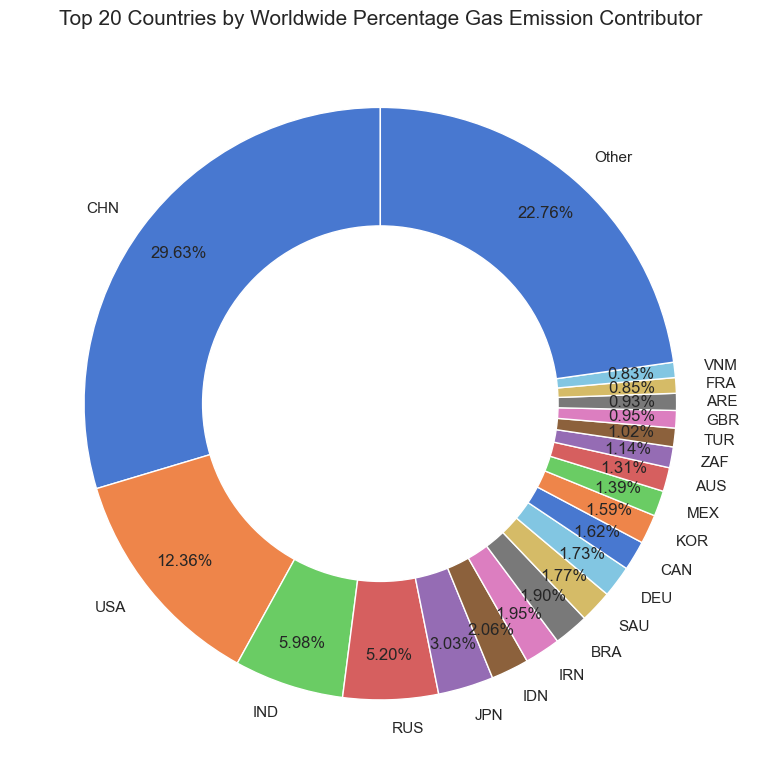

In [310]:
sns.set(style='whitegrid', palette='muted')
#sns.set(style='whitegrid', palette='pastel')

# Sort and split
Z_sorted = Z.sort_values('Worldwide Percentage', ascending=False)

# Top 20 countries
Z_top20 = Z_sorted.head(20)

# Combine the rest into "Other"
other_sum = Z_sorted['Worldwide Percentage'].iloc[20:].sum()

# Append the "Other" row
Z_final = pd.concat([
    Z_top20,
    pd.DataFrame({'alpha3': ['Other'], 'Worldwide Percentage': [other_sum]})
], ignore_index=True)

# Plot
plt.figure(figsize=(8, 8))
plt.pie(
    x=Z_final['Worldwide Percentage'],
    labels=Z_final['alpha3'],
    autopct='%.2f%%',
    startangle=90,
    pctdistance=0.85
)

# Make it a donut chart for readability
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Top 20 Countries by Worldwide ' \
'Percentage Gas Emission Contributor', fontsize=15)
plt.tight_layout()
plt.show()


# **C. SQL - Combination Data**

#### **X data preparation**

In [145]:
list = ['United States', 'Canada', 'Germany', 'Norway', 'United Kingdom', 'China', 'India', 'Japan', 'Indonesia', 'Australia', 'Brazil', 'Mexico']
x = X[X['Entity'].isin(list)]
x.head()

Entity Code  Year  Annual_CO2_emissions
2221  Australia  AUS  1970           147861020.0
2222  Australia  AUS  1971           151116060.0
2223  Australia  AUS  1972           153598260.0
2224  Australia  AUS  1973           170143800.0
2225  Australia  AUS  1974           166182740.0

In [146]:
x['Entity'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'India',
       'Indonesia', 'Japan', 'Mexico', 'Norway', 'United Kingdom',
       'United States'], dtype=object)

In [147]:
X[X['Entity'].str.contains(r'United', case=False, na=False, regex=True)]

Entity Code  Year  Annual_CO2_emissions
27146  United Arab Emirates  ARE  1970          1.523491e+07
27147  United Arab Emirates  ARE  1971          2.116693e+07
27148  United Arab Emirates  ARE  1972          2.343494e+07
27149  United Arab Emirates  ARE  1973          3.060539e+07
27150  United Arab Emirates  ARE  1974          3.130155e+07
...                     ...  ...   ...                   ...
27693         United States  USA  2019          5.262145e+09
27694         United States  USA  2020          4.714628e+09
27695         United States  USA  2021          5.032213e+09
27696         United States  USA  2022          5.078871e+09
27697         United States  USA  2023          4.911391e+09

[162 rows x 4 columns]

In [148]:
x.shape

(648, 4)

In [149]:
x.isna().sum()

Entity                  0
Code                    0
Year                    0
Annual_CO2_emissions    0
dtype: int64

#### **Y data preparation**

In [150]:
list = ['United States', 'Canada', 'Germany', 'Norway', 'United Kingdom', 'China', 'India', 'Japan', 'Indonesia', 'Australia', 'Brazil', 'Mexico']
y = Y[Y['country'].isin(list)]
y.head() 

country  year iso_code  population           gdp  \
1640  Australia  1970      AUS  12595038.0  2.426446e+11   
1641  Australia  1971      AUS  12993837.0  2.534398e+11   
1642  Australia  1972      AUS  13300319.0  2.605356e+11   
1643  Australia  1973      AUS  13513318.0  2.746595e+11   
1644  Australia  1974      AUS  13713392.0  2.814742e+11   

      biofuel_cons_change_pct  biofuel_cons_change_twh  \
1640                      NaN                      NaN   
1641                      NaN                      NaN   
1642                      NaN                      NaN   
1643                      NaN                      NaN   
1644                      NaN                      NaN   

      biofuel_cons_per_capita  biofuel_consumption  biofuel_elec_per_capita  \
1640                      NaN                  NaN                      NaN   
1641                      NaN                  NaN                      NaN   
1642                      NaN                  NaN                      NaN   
1643                      NaN                  NaN                      NaN   
1644                      NaN                  NaN                      NaN   

      biofuel_electricity  biofuel_share_elec  biofuel_share_energy  \
1640                  NaN                 NaN                   NaN   
1641                  NaN                 NaN                   NaN   
1642                  NaN                 NaN                   NaN   
1643                  NaN                 NaN                   NaN   
1644                  NaN                 NaN                   NaN   

      carbon_intensity_elec  coal_cons_change_pct  coal_cons_change_twh  \
1640                    NaN                 1.054                 2.417   
1641                    NaN                 0.378                 0.875   
1642                    NaN                 4.455                10.361   
1643                    NaN                 4.139                10.056   
1644                    NaN                 4.381                11.083   

      coal_cons_per_capita  coal_consumption  coal_elec_per_capita  \
1640             18395.691           231.694                   NaN   
1641             17898.441           232.569                   NaN   
1642             18265.016           242.931                   NaN   
1643             18721.242           252.986                   NaN   
1644             19256.316           264.069                   NaN   

      coal_electricity  coal_prod_change_pct  coal_prod_change_twh  \
1640               NaN                 5.869                19.971   
1641               NaN                -6.074               -21.879   
1642               NaN                21.236                71.853   
1643               NaN                 2.051                 8.413   
1644               NaN                 5.364                22.454   

      coal_prod_per_capita  coal_production  coal_share_elec  \
1640             28601.502          360.237              NaN   
1641             26039.848          338.358              NaN   
1642             30842.145          410.210              NaN   
1643             30978.580          418.623              NaN   
1644             32164.012          441.078              NaN   

      coal_share_energy  electricity_demand  electricity_demand_per_capita  \
1640             40.641                 NaN                            NaN   
1641             38.839                 NaN                            NaN   
1642             38.801                 NaN                            NaN   
1643             37.795                 NaN                            NaN   
1644             37.094                 NaN                            NaN   

      electricity_generation  electricity_share_energy  \
1640                     NaN                       NaN   
1641                     NaN                       NaN   
1642                     NaN                       NaN   
1643             

In [151]:
y['country'].unique()

array(['Australia', 'Brazil', 'Canada', 'China', 'Germany', 'India',
       'Indonesia', 'Japan', 'Mexico', 'Norway', 'United Kingdom',
       'United States'], dtype=object)

In [152]:
y = y[['country', 'year', 'iso_code', 'population', 'gdp', 
       'biofuel_consumption', 'biofuel_cons_change_pct', 'biofuel_share_energy', 
       'hydro_consumption', 'hydro_cons_change_pct', 'hydro_share_energy', 
       'solar_consumption', 'solar_cons_change_pct', 'solar_share_energy', 
       'wind_consumption', 'wind_cons_change_pct', 'wind_share_energy',
       'renewables_consumption', 'renewables_cons_change_pct', 'renewables_share_energy',
       'other_renewable_consumption', 'other_renewables_cons_change_pct', 'other_renewables_share_energy',
       'coal_consumption', 'coal_cons_change_pct', 'coal_share_energy', 
       'fossil_fuel_consumption', 'fossil_cons_change_pct', 'fossil_share_energy',
       'gas_consumption', 'gas_cons_change_pct', 'gas_share_energy',
       'oil_consumption', 'oil_cons_change_pct', 'oil_share_energy',
       'Renewable Energy Consumption', 'Renewable Energy Change Pct', 'Renewable Energy Share',
       'Convention Energy Consumption', 'Convention Energy Change Pct', 'Convention Energy Share']]

In [153]:
y

country  year iso_code   population           gdp  \
1640       Australia  1970      AUS   12595038.0  2.426446e+11   
1641       Australia  1971      AUS   12993837.0  2.534398e+11   
1642       Australia  1972      AUS   13300319.0  2.605356e+11   
1643       Australia  1973      AUS   13513318.0  2.746595e+11   
1644       Australia  1974      AUS   13713392.0  2.814742e+11   
...              ...   ...      ...          ...           ...   
20488  United States  2019      USA  334319680.0  1.854055e+13   
20489  United States  2020      USA  335942016.0  1.802736e+13   
20490  United States  2021      USA  336997632.0  1.909938e+13   
20491  United States  2022      USA  338289856.0  1.949317e+13   
20492  United States  2023      USA  339996576.0           NaN   

       biofuel_consumption  biofuel_cons_change_pct  biofuel_share_energy  \
1640                   NaN                      NaN                   NaN   
1641                   NaN                      NaN                   NaN   
1642                   NaN                      NaN                   NaN   
1643                   NaN                      NaN                   NaN   
1644                   NaN                      NaN                   NaN   
...                    ...                      ...                   ...   
20488              415.870                    2.780                 1.565   
20489              378.321                   -9.029                 1.536   
20490              415.839                    9.917                 1.602   
20491              437.593                    5.231                 1.651   
20492              495.419                   13.215                 1.892   

       hydro_consumption  hydro_cons_change_pct  hydro_share_energy  \
1640              30.075                 17.118               5.275   
1641              34.027                 13.143               5.683   
1642              34.163                  0.399               5.457   
1643              36.329                  6.340               5.427   
1644              41.025                 12.926               5.763   
...                  ...                    ...                 ...   
20488            752.485                 -1.398               2.831   
20489            742.663                 -0.941               3.016   
20490            651.455                -11.959               2.510   
20491            655.104                  0.928               2.472   
20492            613.883                 -5.951               2.344   

       solar_consumption  solar_cons_change_pct  solar_share_energy  \
1640                 NaN                    NaN                 NaN   
1641                 NaN                    NaN                 NaN   
1642                 NaN                    NaN                 NaN   
1643                 NaN                    NaN                 NaN   
1644                 NaN                    NaN                 NaN   
...                  ...                    ...                 ...   
20488            284.616                 14.490               1.071   
20489            346.779                 22.290               1.408   
20490            434.585                 25.781               1.674   
20491            540.069                 24.727               2.038   
20492            624.803                 16.111               2.386   

       wind_consumption  wind_cons_change_pct  wind_share_energy  \
1640                NaN                   NaN                NaN   
1641                NaN                   NaN                NaN   
1642                NaN                   NaN                NaN   
1643                NaN                   NaN                NaN   
1644                NaN                   NaN                NaN   
...                 ...                   ...                ...   
20488           787.816                 8.514              2.964   
20489           896.488                14.214

In [154]:
y.shape

(648, 41)

In [155]:
y.isna().sum()

country                               0
year                                  0
iso_code                              0
population                            0
gdp                                  12
biofuel_consumption                 277
biofuel_cons_change_pct             348
biofuel_share_energy                277
hydro_consumption                     0
hydro_cons_change_pct                 0
hydro_share_energy                    7
solar_consumption                    97
solar_cons_change_pct               309
solar_share_energy                  104
wind_consumption                     81
wind_cons_change_pct                269
wind_share_energy                    88
renewables_consumption                0
renewables_cons_change_pct            0
renewables_share_energy               7
other_renewable_consumption           8
other_renewables_cons_change_pct    114
other_renewables_share_energy        15
coal_consumption                      0
coal_cons_change_pct                  0


<Axes: >

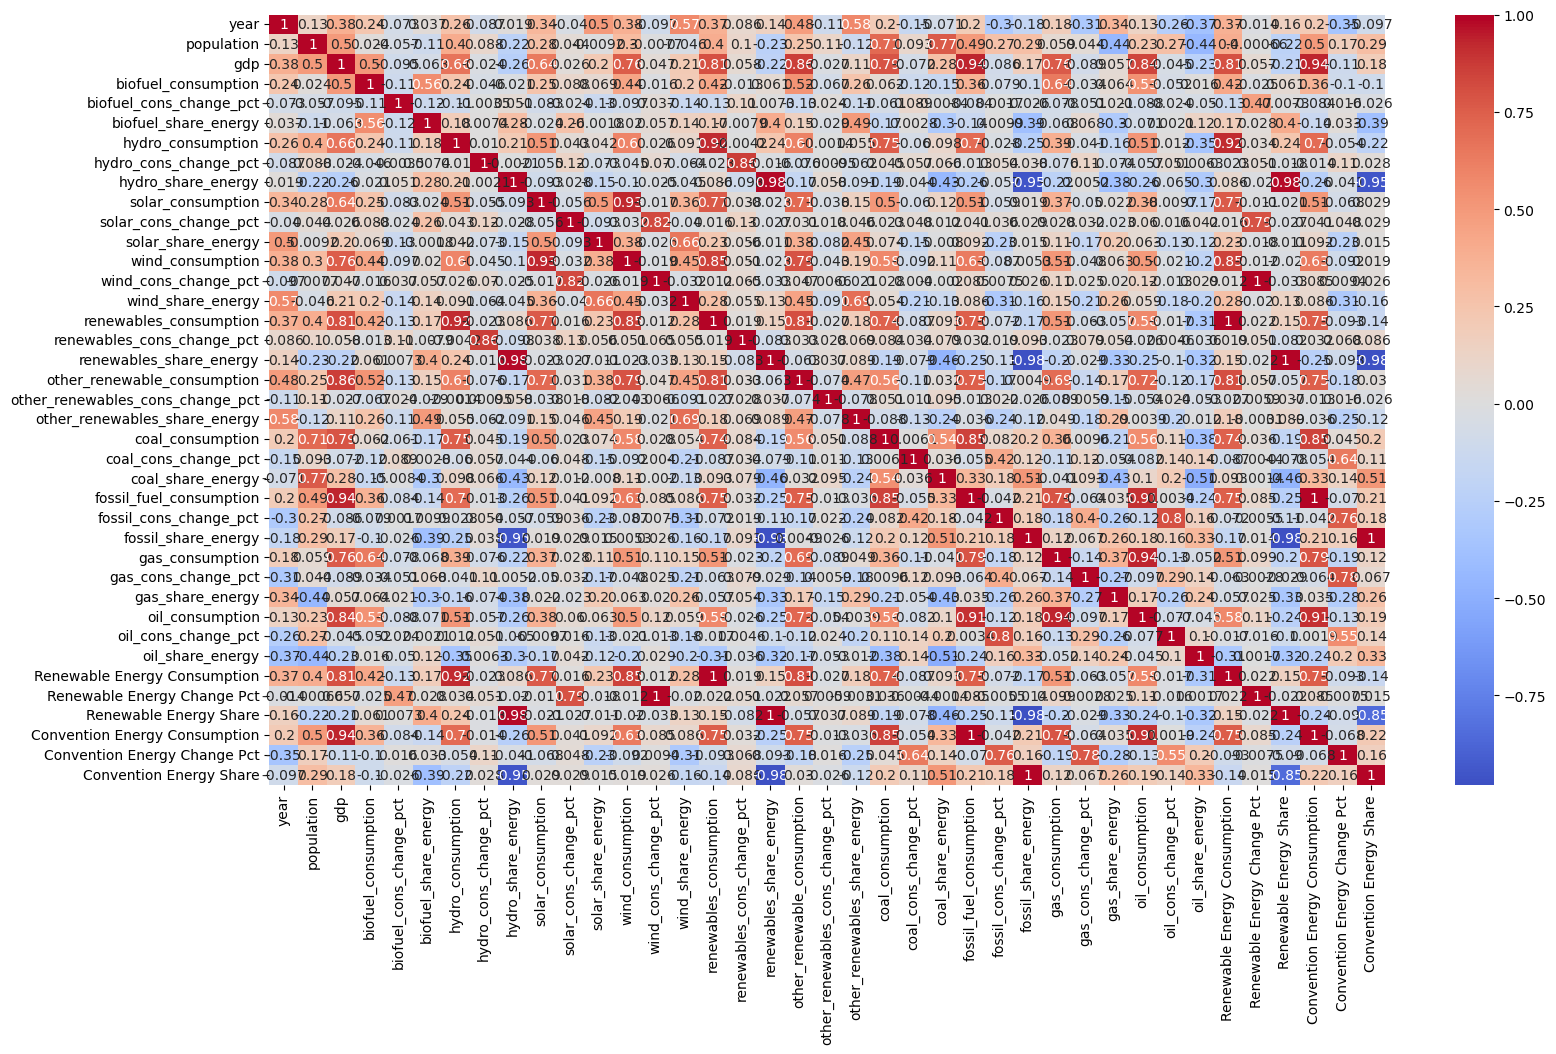

In [156]:
plt.figure(figsize=(18,10))
sns.heatmap(data = y.corr(numeric_only=True),
            cmap= 'coolwarm',
            center = 0,                         # Put parameter 0 as the lowest
            annot = True) 

In [157]:
# Check data lenght each countries
country_leny = (
    y.groupby("country")
           .size()
           .reset_index(name="Row_Count"))
country_leny.head(50)

country  Row_Count
0        Australia         54
1           Brazil         54
2           Canada         54
3            China         54
4          Germany         54
5            India         54
6        Indonesia         54
7            Japan         54
8           Mexico         54
9           Norway         54
10  United Kingdom         54
11   United States         54

In [158]:
# Check count of NaN values using pivot table
nan_pivot = pd.pivot_table(
    data=y,
    index='country',
    values= y,
    aggfunc=lambda x: x.isna().sum())
nan_pivot

Convention Energy Change Pct  Convention Energy Consumption  \
country                                                                       
Australia                                  0                              0   
Brazil                                     0                              0   
Canada                                     0                              0   
China                                      0                              0   
Germany                                    0                              0   
India                                      0                              0   
Indonesia                                  0                              0   
Japan                                      0                              0   
Mexico                                     0                              0   
Norway                                     0                              0   
United Kingdom                             0                              0   
United States                              0                              0   

                Convention Energy Share  Renewable Energy Change Pct  \
country                                                                
Australia                             0                            0   
Brazil                                0                            0   
Canada                                0                            0   
China                                 0                            0   
Germany                               0                            0   
India                                 0                            0   
Indonesia                             0                            0   
Japan                                 0                            0   
Mexico                                0                            0   
Norway                                0                            0   
United Kingdom                        0                            0   
United States                         0                            0   

                Renewable Energy Consumption  Renewable Energy Share  \
country                                                                
Australia                                  0                       0   
Brazil                                     0                       0   
Canada                                     0                       0   
China                                      0                       0   
Germany                                    0                       0   
India                                      0                       0   
Indonesia                                  0                       0   
Japan                                      0                       0   
Mexico                                     0                       0   
Norway                                     0                       0   
United Kingdom                             0                       0   
United States                              0                       0   

                biofuel_cons_change_pct  biofuel_consumption  \
country                                                        
Australia                            36                   20   
Brazil                                1                    0   
Canada                               29                   25   
China                                33                   30   
Germany                              23                   22   
India                                31                   29   
Indonesia                            36                   30   
Japan                                37                   32   
Mexico                               31                   20   
Norway                               37                   20   
United Kingdom                       33                   29   
United States                        21                   2

In [159]:
y[y['country'] == 'Australia']

country  year iso_code  population           gdp  biofuel_consumption  \
1640  Australia  1970      AUS  12595038.0  2.426446e+11                  NaN   
1641  Australia  1971      AUS  12993837.0  2.534398e+11                  NaN   
1642  Australia  1972      AUS  13300319.0  2.605356e+11                  NaN   
1643  Australia  1973      AUS  13513318.0  2.746595e+11                  NaN   
1644  Australia  1974      AUS  13713392.0  2.814742e+11                  NaN   
1645  Australia  1975      AUS  13886865.0  2.891030e+11                  NaN   
1646  Australia  1976      AUS  14038078.0  3.007557e+11                  NaN   
1647  Australia  1977      AUS  14193365.0  3.038880e+11                  NaN   
1648  Australia  1978      AUS  14355814.0  3.127283e+11                  NaN   
1649  Australia  1979      AUS  14520529.0  3.291943e+11                  NaN   
1650  Australia  1980      AUS  14706329.0  3.357565e+11                  NaN   
1651  Australia  1981      AUS  14930055.0  3.487268e+11                  NaN   
1652  Australia  1982      AUS  15168446.0  3.483015e+11                  NaN   
1653  Australia  1983      AUS  15383079.0  3.483536e+11                  NaN   
1654  Australia  1984      AUS  15579478.0  3.723796e+11                  NaN   
1655  Australia  1985      AUS  15785685.0  3.912293e+11                  NaN   
1656  Australia  1986      AUS  16012299.0  3.993444e+11                  NaN   
1657  Australia  1987      AUS  16259251.0  4.190940e+11                  NaN   
1658  Australia  1988      AUS  16525901.0  4.379128e+11                  NaN   
1659  Australia  1989      AUS  16796586.0  4.571762e+11                  NaN   
1660  Australia  1990      AUS  17048002.0  4.641366e+11                0.000   
1661  Australia  1991      AUS  17271092.0  4.613021e+11                0.000   
1662  Australia  1992      AUS  17462500.0  4.786338e+11                0.000   
1663  Australia  1993      AUS  17631514.0  5.015248e+11                0.000   
1664  Australia  1994      AUS  17805506.0  5.279932e+11                0.000   
1665  Australia  1995      AUS  18003002.0  5.490388e+11                0.000   
1666  Australia  1996      AUS  18211850.0  5.747657e+11                0.000   
1667  Australia  1997      AUS  18410254.0  6.014728e+11                0.000   
1668  Australia  1998      AUS  18601666.0  6.348470e+11                0.000   
1669  Australia  1999      AUS  18800892.0  6.645208e+11                0.000   
1670  Australia  2000      AUS  19017968.0  6.920593e+11                0.000   
1671  Australia  2001      AUS  19248146.0  7.138901e+11                0.000   
1672  Australia  2002      AUS  19475842.0  7.470657e+11                0.000   
1673  Australia  2003      AUS  19699004.0  7.744510e+11                0.000   
1674  Australia  2004      AUS  19925060.0  8.097924e+11                0.000   
1675  Australia  2005      AUS  20171732.0  8.400924e+11                0.234   
1676  Australia  2006      AUS  20467032.0  8.666787e+11                0.759   
1677  Australia  2007      AUS  20830832.0  9.112508e+11                0.966   
1678  Australia  2008      AUS  21247876.0  9.378896e+11                1.279   
1679  Australia  2009      AUS  21660898.0  9.631300e+11                1.773   
1680  Australia  2010      AUS  22019166.0  9.938540e+11                2.577   
1681  Australia  2011      AUS  22357032.0  1.024000e+12                3.068   
1682  Australia  2012      AUS  22729272.0  1.062663e+12                2.982   
1683  Australia  2013      AUS  23111788.0  1.086068e+12                2.921   
1684  Australia  2014      AUS  23469578.0  1.113888e+12                3.003   
1685  Australia  2015      AUS  23820240.0  1.139303e+12                2.387   
1686  Australia  2016      AUS  24195706.0  1.169967e+12                1.856   
1687  Australia  2017      AUS  24590336.0  1.197833e+12                1.834   
1688  Australia  2018      AUS  2497922

Based on NaN count pivot tables, the cata concluded has a similar types of missing values each countries
1. Have a similar missing value count throughout the data
    - Through random checking, the missing values is placed on earlier year. Hence, the missing values is replaced with min values

In [160]:
# Missing value handling -> using min
y = y.groupby("country").apply(lambda g: g.fillna(g.min())).reset_index(drop=True)

In [161]:
y[y['country'] == 'Canada']

country  year iso_code  population           gdp  biofuel_consumption  \
108  Canada  1970      CAN  21434580.0  4.177520e+11                0.000   
109  Canada  1971      CAN  21888686.0  4.410566e+11                0.000   
110  Canada  1972      CAN  22222228.0  4.643421e+11                0.000   
111  Canada  1973      CAN  22502026.0  4.976174e+11                0.000   
112  Canada  1974      CAN  22812430.0  5.179518e+11                0.000   
113  Canada  1975      CAN  23136250.0  5.296107e+11                0.000   
114  Canada  1976      CAN  23442118.0  5.586347e+11                0.000   
115  Canada  1977      CAN  23715310.0  5.774197e+11                0.000   
116  Canada  1978      CAN  23962686.0  6.007633e+11                0.000   
117  Canada  1979      CAN  24219116.0  6.257371e+11                0.000   
118  Canada  1980      CAN  24511512.0  6.341136e+11                0.000   
119  Canada  1981      CAN  24815780.0  6.537744e+11                0.000   
120  Canada  1982      CAN  25101514.0  6.338530e+11                0.000   
121  Canada  1983      CAN  25360732.0  6.523177e+11                0.000   
122  Canada  1984      CAN  25602080.0  6.897335e+11                0.000   
123  Canada  1985      CAN  25843920.0  7.270133e+11                0.000   
124  Canada  1986      CAN  26116076.0  7.460746e+11                0.000   
125  Canada  1987      CAN  26436886.0  7.764725e+11                0.000   
126  Canada  1988      CAN  26815068.0  8.142400e+11                0.000   
127  Canada  1989      CAN  27244408.0  8.339187e+11                0.000   
128  Canada  1990      CAN  27657206.0  8.359968e+11                0.000   
129  Canada  1991      CAN  28015762.0  8.202743e+11                0.000   
130  Canada  1992      CAN  28347644.0  8.297421e+11                0.000   
131  Canada  1993      CAN  28668168.0  8.537760e+11                0.000   
132  Canada  1994      CAN  28981190.0  8.948519e+11                0.000   
133  Canada  1995      CAN  29289430.0  9.213601e+11                0.000   
134  Canada  1996      CAN  29593856.0  9.388725e+11                0.000   
135  Canada  1997      CAN  29882752.0  9.817281e+11                0.000   
136  Canada  1998      CAN  30144816.0  1.022475e+12                1.235   
137  Canada  1999      CAN  30399776.0  1.078415e+12                1.441   
138  Canada  2000      CAN  30683316.0  1.137681e+12                1.548   
139  Canada  2001      CAN  31002768.0  1.161460e+12                1.544   
140  Canada  2002      CAN  31322400.0  1.199866e+12                1.544   
141  Canada  2003      CAN  31619456.0  1.224576e+12                1.681   
142  Canada  2004      CAN  31911670.0  1.265917e+12                1.686   
143  Canada  2005      CAN  32215914.0  1.310078e+12                1.990   
144  Canada  2006      CAN  32531864.0  1.348293e+12                2.008   
145  Canada  2007      CAN  32862458.0  1.379926e+12                7.727   
146  Canada  2008      CAN  33218542.0  1.397939e+12                9.289   
147  Canada  2009      CAN  33593920.0  1.360538e+12                8.931   
148  Canada  2010      CAN  33963416.0  1.406355e+12               10.408   
149  Canada  2011      CAN  34323536.0  1.454221e+12               16.786   
150  Canada  2012      CAN  34691876.0  1.479830e+12               21.906   
151  Canada  2013      CAN  35063696.0  1.514296e+12               21.473   
152  Canada  2014      CAN  35404616.0  1.557758e+12               22.155   
153  Canada  2015      CAN  35732120.0  1.568026e+12               20.805   
154  Canada  2016      CAN  36113532.0  1.583728e+12               20.059   
155  Canada  2017      CAN  36554344.0  1.631871e+12               23.655   
156  Canada  2018      CAN  37035260.0  1.677189e+12               24.433   
157  Canada  2019      CAN  37522584.0  1.708858e+12               24.755   
158  Canada  2020      CAN  37888704.0  1.622144e+12               22.951   


#### **Z data preparation**

In [162]:
list = ['USA', 'CAN', 'DEU', 'NOR', 'GBR','CHN', 'IND', 'JPN', 'IDN', 'AUS', 'BRA', 'MEX']
z = Z[Z['alpha3'].isin(list)]
z

alpha3 continent_x  rank  previousRank assetCount alpha2  \
50     NOR        null    48             0       None     NO   
63     IND        null     3             0       None     IN   
96     AUS        null    12             0       None     AU   
100    CHN        null     1             0       None     CN   
126    JPN        null     7             0       None     JP   
146    GBR        null    24             0       None     GB   
196    USA        null     2             0       None     US   
220    DEU        null    13             0       None     DE   
223    IDN        null     6             0       None     ID   
233    CAN        null    10             0       None     CA   
235    BRA        null     5             0       None     BR   
249    MEX        null    11             0       None     MX   

                                                  name    continent_y  \
50                                              Norway         Europe   
63                                               India           Asia   
96                                           Australia        Oceania   
100                                              China           Asia   
126                                              Japan           Asia   
146  United Kingdom of Great Britain and Northern I...         Europe   
196                           United States of America  North America   
220                                            Germany         Europe   
223                                          Indonesia           Asia   
233                                             Canada  North America   
235                                             Brazil  South America   
249                                             Mexico  North America   

     emissions_co2  emissions_ch4  emissions_n2o  emissions_co2e_100yr  \
50    1.105673e+09   8.534349e+06   1.348530e+05          1.405894e+09   
63    2.670310e+10   2.794534e+08   7.396099e+06          3.705365e+10   
96    5.815928e+09   7.594441e+07   1.476801e+06          8.514823e+09   
100   1.329915e+11   7.669788e+08   1.337643e+07          1.634215e+11   
126   1.364085e+10   1.779504e+07   6.975825e+05          1.456389e+10   
146   4.267455e+09   1.924490e+07   1.072841e+06          5.243750e+09   
196   5.545860e+10   3.187566e+08   6.866695e+06          6.866669e+10   
220   7.800566e+09   2.424543e+07   1.219046e+06          8.954364e+09   
223   9.193309e+09   1.259375e+08   2.425763e+06          1.361336e+10   
233   7.284035e+09   4.257782e+07   1.610288e+06          9.146217e+09   
235   8.386622e+09   1.922888e+08   5.944385e+06          1.541577e+10   
249   6.204373e+09   8.154760e+07   2.012463e+06          9.206867e+09   

     emissions_co2e_20yr  worldEmissions_co2  worldEmissions_ch4  \
50          1.864553e+09        4.475352e+11        3.868929e+09   
63          5.232640e+10        4.475352e+11        3.868929e+09   
96          1.263508e+10        4.475352e+11        3.868929e+09   
100         2.060274e+11        4.475352e+11        3.868929e+09   
126         1.573623e+10        4.475352e+11        3.868929e+09   
146         6.414140e+09        4.475352e+11        3.868929e+09   
196         8.732963e+10        4.475352e+11        3.868929e+09   
220         1.035495e+10        4.475352e+11        3.868929e+09   
223         2.040670e+10        4.475352e+11        3.868929e+09   
233         1.154115e+10        4.475352e+11        3.868929e+09   
235         2.574022e+10        4.475352e+11        3.868929e+09   
249         1.374176e+10        4.475352e+11        3.868929e+09   

     worldEmissions_n2o  worldEmissions_co2e_100yr  worldEmissions_co2e_20yr  \
50         8.404421e+07               5.941174e+11              8.090490e+11   
63         8.404421e+07               5.941174e+11              8.090490e+11   
96         8.404421e+07               5.941174e+11              8.090490e+11   
100        8.404421e+07               5.941174e+11   

In [163]:
z['name'].unique()

array(['Norway', 'India', 'Australia', 'China', 'Japan',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Germany', 'Indonesia', 'Canada',
       'Brazil', 'Mexico'], dtype=object)

In [164]:
z.isna().sum()

alpha3                         0
continent_x                    0
rank                           0
previousRank                   0
assetCount                    12
alpha2                         0
name                           0
continent_y                    0
emissions_co2                  0
emissions_ch4                  0
emissions_n2o                  0
emissions_co2e_100yr           0
emissions_co2e_20yr            0
worldEmissions_co2             0
worldEmissions_ch4             0
worldEmissions_n2o             0
worldEmissions_co2e_100yr      0
worldEmissions_co2e_20yr       0
emissionsChange_co2           12
emissionsChange_ch4           12
emissionsChange_n2o           12
emissionsChange_co2e_100yr    12
emissionsChange_co2e_20yr     12
Total Emission                 0
Total Emission (Billion)       0
Total World Emission           0
Worldwide Percentage           0
dtype: int64

<Axes: >

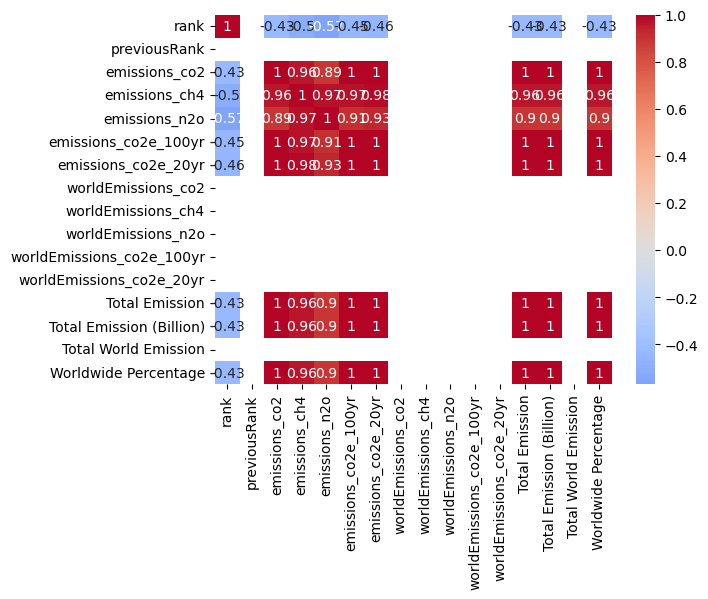

In [165]:
sns.heatmap(data = z.corr(numeric_only=True),
            cmap= 'coolwarm',
            center = 0,                         
            annot = True) 

Notes : Remove assetcount and emission change due to null data, as well as previous rank since has no giev any information

In [166]:
z.drop(columns= ['previousRank','assetCount', 'emissionsChange_co2', 'emissionsChange_ch4', 'emissionsChange_n2o', 'emissionsChange_co2e_100yr', 'emissionsChange_co2e_20yr'], inplace=True)

In [167]:
z

alpha3 continent_x  rank alpha2  \
50     NOR        null    48     NO   
63     IND        null     3     IN   
96     AUS        null    12     AU   
100    CHN        null     1     CN   
126    JPN        null     7     JP   
146    GBR        null    24     GB   
196    USA        null     2     US   
220    DEU        null    13     DE   
223    IDN        null     6     ID   
233    CAN        null    10     CA   
235    BRA        null     5     BR   
249    MEX        null    11     MX   

                                                  name    continent_y  \
50                                              Norway         Europe   
63                                               India           Asia   
96                                           Australia        Oceania   
100                                              China           Asia   
126                                              Japan           Asia   
146  United Kingdom of Great Britain and Northern I...         Europe   
196                           United States of America  North America   
220                                            Germany         Europe   
223                                          Indonesia           Asia   
233                                             Canada  North America   
235                                             Brazil  South America   
249                                             Mexico  North America   

     emissions_co2  emissions_ch4  emissions_n2o  emissions_co2e_100yr  \
50    1.105673e+09   8.534349e+06   1.348530e+05          1.405894e+09   
63    2.670310e+10   2.794534e+08   7.396099e+06          3.705365e+10   
96    5.815928e+09   7.594441e+07   1.476801e+06          8.514823e+09   
100   1.329915e+11   7.669788e+08   1.337643e+07          1.634215e+11   
126   1.364085e+10   1.779504e+07   6.975825e+05          1.456389e+10   
146   4.267455e+09   1.924490e+07   1.072841e+06          5.243750e+09   
196   5.545860e+10   3.187566e+08   6.866695e+06          6.866669e+10   
220   7.800566e+09   2.424543e+07   1.219046e+06          8.954364e+09   
223   9.193309e+09   1.259375e+08   2.425763e+06          1.361336e+10   
233   7.284035e+09   4.257782e+07   1.610288e+06          9.146217e+09   
235   8.386622e+09   1.922888e+08   5.944385e+06          1.541577e+10   
249   6.204373e+09   8.154760e+07   2.012463e+06          9.206867e+09   

     emissions_co2e_20yr  worldEmissions_co2  worldEmissions_ch4  \
50          1.864553e+09        4.475352e+11        3.868929e+09   
63          5.232640e+10        4.475352e+11        3.868929e+09   
96          1.263508e+10        4.475352e+11        3.868929e+09   
100         2.060274e+11        4.475352e+11        3.868929e+09   
126         1.573623e+10        4.475352e+11        3.868929e+09   
146         6.414140e+09        4.475352e+11        3.868929e+09   
196         8.732963e+10        4.475352e+11        3.868929e+09   
220         1.035495e+10        4.475352e+11        3.868929e+09   
223         2.040670e+10        4.475352e+11        3.868929e+09   
233         1.154115e+10        4.475352e+11        3.868929e+09   
235         2.574022e+10        4.475352e+11        3.868929e+09   
249         1.374176e+10        4.475352e+11        3.868929e+09   

     worldEmissions_n2o  worldEmissions_co2e_100yr  worldEmissions_co2e_20yr  \
50         8.404421e+07               5.941174e+11              8.090490e+11   
63         8.404421e+07               5.941174e+11              8.090490e+11   
96         8.404421e+07               5.941174e+11              8.090490e+11   
100        8.404421e+07               5.941174e+11              8.090490e+11   
126        8.404421e+07               5.941174e+11              8.090490e+11   
146        8.404421e+07               5.941174e+11              8.090490e+11   
196        8.404421e+07               5.941174e+11              8.090490e+11   
220        8.404421e+07               5.941174e+11        

## **D. Data Exploration**

### **Data Convirmation**

In [168]:
x.head()

Entity Code  Year  Annual_CO2_emissions
2221  Australia  AUS  1970           147861020.0
2222  Australia  AUS  1971           151116060.0
2223  Australia  AUS  1972           153598260.0
2224  Australia  AUS  1973           170143800.0
2225  Australia  AUS  1974           166182740.0

In [169]:
# Import data to excel
x.to_csv('Global Emissions final.csv', index=False, encoding='utf-8')

In [170]:
y.head()

country  year iso_code  population           gdp  biofuel_consumption  \
0  Australia  1970      AUS  12595038.0  2.426446e+11                  0.0   
1  Australia  1971      AUS  12993837.0  2.534398e+11                  0.0   
2  Australia  1972      AUS  13300319.0  2.605356e+11                  0.0   
3  Australia  1973      AUS  13513318.0  2.746595e+11                  0.0   
4  Australia  1974      AUS  13713392.0  2.814742e+11                  0.0   

   biofuel_cons_change_pct  biofuel_share_energy  hydro_consumption  \
0                  -22.239                   0.0             30.075   
1                  -22.239                   0.0             34.027   
2                  -22.239                   0.0             34.163   
3                  -22.239                   0.0             36.329   
4                  -22.239                   0.0             41.025   

   hydro_cons_change_pct  hydro_share_energy  solar_consumption  \
0                 17.118               5.275                0.0   
1                 13.143               5.683                0.0   
2                  0.399               5.457                0.0   
3                  6.340               5.427                0.0   
4                 12.926               5.763                0.0   

   solar_cons_change_pct  solar_share_energy  wind_consumption  \
0                  7.664                 0.0               0.0   
1                  7.664                 0.0               0.0   
2                  7.664                 0.0               0.0   
3                  7.664                 0.0               0.0   
4                  7.664                 0.0               0.0   

   wind_cons_change_pct  wind_share_energy  renewables_consumption  \
0                   0.0                0.0                  30.908   
1                   0.0                0.0                  34.867   
2                   0.0                0.0                  35.057   
3                   0.0                0.0                  37.408   
4                   0.0                0.0                  42.394   

   renewables_cons_change_pct  renewables_share_energy  \
0                      16.359                    5.421   
1                      12.834                    5.823   
2                       0.534                    5.599   
3                       6.681                    5.589   
4                      13.301                    5.955   

   other_renewable_consumption  other_renewables_cons_change_pct  \
0                        0.833                            -7.117   
1                        0.840                             0.766   
2                        0.894                             6.464   
3                        1.079                            20.714   
4                        1.369                            26.923   

   other_renewables_share_energy  coal_consumption  coal_cons_change_pct  \
0                          0.146           231.694                 1.054   
1                          0.140           232.569                 0.378   
2                          0.143           242.931                 4.455   
3                          0.161           252.986                 4.139   
4                          0.192           264.069                 4.381   

   coal_share_energy  fossil_fuel_consumption  fossil_cons_change_pct  \
0             40.641                  539.194                   8.741   
1             38.839                  563.941                   4.590   
2             38.801                  591.038                   4.805   
3             37.795                  631.948                   6.922   
4             37.094                  669.507                   5.943   

   fossil_share_energy  gas_consumption  gas_cons_change_pct  \
0               94.579           17.304              319.338   
1               94.177           25.827               49.253   
2               94.401           37.074   

In [171]:
# Import data to excel
y.to_csv('Energy Consumption final.csv', index=False, encoding='utf-8')

In [172]:
z.head()

alpha3 continent_x  rank alpha2       name continent_y  emissions_co2  \
50     NOR        null    48     NO     Norway      Europe   1.105673e+09   
63     IND        null     3     IN      India        Asia   2.670310e+10   
96     AUS        null    12     AU  Australia     Oceania   5.815928e+09   
100    CHN        null     1     CN      China        Asia   1.329915e+11   
126    JPN        null     7     JP      Japan        Asia   1.364085e+10   

     emissions_ch4  emissions_n2o  emissions_co2e_100yr  emissions_co2e_20yr  \
50    8.534349e+06   1.348530e+05          1.405894e+09         1.864553e+09   
63    2.794534e+08   7.396099e+06          3.705365e+10         5.232640e+10   
96    7.594441e+07   1.476801e+06          8.514823e+09         1.263508e+10   
100   7.669788e+08   1.337643e+07          1.634215e+11         2.060274e+11   
126   1.779504e+07   6.975825e+05          1.456389e+10         1.573623e+10   

     worldEmissions_co2  worldEmissions_ch4  worldEmissions_n2o  \
50         4.475352e+11        3.868929e+09        8.404421e+07   
63         4.475352e+11        3.868929e+09        8.404421e+07   
96         4.475352e+11        3.868929e+09        8.404421e+07   
100        4.475352e+11        3.868929e+09        8.404421e+07   
126        4.475352e+11        3.868929e+09        8.404421e+07   

     worldEmissions_co2e_100yr  worldEmissions_co2e_20yr  Total Emission  \
50                5.941174e+11              8.090490e+11    1.114342e+09   
63                5.941174e+11              8.090490e+11    2.698995e+10   
96                5.941174e+11              8.090490e+11    5.893349e+09   
100               5.941174e+11              8.090490e+11    1.337719e+11   
126               5.941174e+11              8.090490e+11    1.365935e+10   

     Total Emission (Billion)  Total World Emission  Worldwide Percentage  
50                   1.114342          4.514882e+11              0.002468  
63                  26.989945          4.514882e+11              0.059780  
96                   5.893349          4.514882e+11              0.013053  
100                133.771877          4.514882e+11              0.296291  
126                 13.659347          4.514882e+11              0.030254

In [175]:
df = pd.read_csv('/Users/suchay/Documents/Suchay/Data Science/VS Coding/Capstone Project/energy_merged.csv',sep=';')
df.head()

Entity Code  Year  Annual_CO2_emissions    country  time iso_code  \
0  Australia  AUS  1970           147861020.0  Australia  1970      AUS   
1  Australia  AUS  1971           151116060.0  Australia  1971      AUS   
2  Australia  AUS  1972           153598260.0  Australia  1972      AUS   
3  Australia  AUS  1973           170143800.0  Australia  1973      AUS   
4  Australia  AUS  1974           166182740.0  Australia  1974      AUS   

   population           gdp  biofuel_consumption  biofuel_cons_change_pct  \
0  12595038.0  2.426446e+11                  0.0                  -22.239   
1  12993837.0  2.534398e+11                  0.0                  -22.239   
2  13300319.0  2.605356e+11                  0.0                  -22.239   
3  13513318.0  2.746595e+11                  0.0                  -22.239   
4  13713392.0  2.814742e+11                  0.0                  -22.239   

   biofuel_share_energy  hydro_consumption  hydro_cons_change_pct  \
0                   0.0             30.075                 17.118   
1                   0.0             34.027                 13.143   
2                   0.0             34.163                  0.399   
3                   0.0             36.329                  6.340   
4                   0.0             41.025                 12.926   

   hydro_share_energy  solar_consumption  solar_cons_change_pct  \
0               5.275                0.0                  7.664   
1               5.683                0.0                  7.664   
2               5.457                0.0                  7.664   
3               5.427                0.0                  7.664   
4               5.763                0.0                  7.664   

   solar_share_energy  wind_consumption  wind_cons_change_pct  \
0                 0.0               0.0                   0.0   
1                 0.0               0.0                   0.0   
2                 0.0               0.0                   0.0   
3                 0.0               0.0                   0.0   
4                 0.0               0.0                   0.0   

   wind_share_energy  renewables_consumption  renewables_cons_change_pct  \
0                0.0                  30.908                      16.359   
1                0.0                  34.867                      12.834   
2                0.0                  35.057                       0.534   
3                0.0                  37.408                       6.681   
4                0.0                  42.394                      13.301   

   renewables_share_energy  other_renewable_consumption  \
0                    5.421                        0.833   
1                    5.823                        0.840   
2                    5.599                        0.894   
3                    5.589                        1.079   
4                    5.955                        1.369   

   other_renewables_cons_change_pct  other_renewables_share_energy  \
0                            -7.117                          0.146   
1                             0.766                          0.140   
2                             6.464                          0.143   
3                            20.714                          0.161   
4                            26.923                          0.192   

   coal_consumption  coal_cons_change_pct  coal_share_energy  \
0           231.694                 1.054             40.641   
1           232.569                 0.378             38.839   
2           242.931                 4.455             38.801   
3           252.986                 4.139             37.795   
4           264.069                 4.381             37.094   

   fossil_fuel_consumption  fossil_cons_change_pct  fossil_share_energy  \
0                  539.194                   8.741               94.579   
1                  563.941                   4.590               94.177   
2                  591.038              

In [178]:
df = df.drop(columns= ['country', 'time', 'iso_code'])
df.head()

Entity Code  Year  Annual_CO2_emissions  population           gdp  \
0  Australia  AUS  1970           147861020.0  12595038.0  2.426446e+11   
1  Australia  AUS  1971           151116060.0  12993837.0  2.534398e+11   
2  Australia  AUS  1972           153598260.0  13300319.0  2.605356e+11   
3  Australia  AUS  1973           170143800.0  13513318.0  2.746595e+11   
4  Australia  AUS  1974           166182740.0  13713392.0  2.814742e+11   

   biofuel_consumption  biofuel_cons_change_pct  biofuel_share_energy  \
0                  0.0                  -22.239                   0.0   
1                  0.0                  -22.239                   0.0   
2                  0.0                  -22.239                   0.0   
3                  0.0                  -22.239                   0.0   
4                  0.0                  -22.239                   0.0   

   hydro_consumption  hydro_cons_change_pct  hydro_share_energy  \
0             30.075                 17.118               5.275   
1             34.027                 13.143               5.683   
2             34.163                  0.399               5.457   
3             36.329                  6.340               5.427   
4             41.025                 12.926               5.763   

   solar_consumption  solar_cons_change_pct  solar_share_energy  \
0                0.0                  7.664                 0.0   
1                0.0                  7.664                 0.0   
2                0.0                  7.664                 0.0   
3                0.0                  7.664                 0.0   
4                0.0                  7.664                 0.0   

   wind_consumption  wind_cons_change_pct  wind_share_energy  \
0               0.0                   0.0                0.0   
1               0.0                   0.0                0.0   
2               0.0                   0.0                0.0   
3               0.0                   0.0                0.0   
4               0.0                   0.0                0.0   

   renewables_consumption  renewables_cons_change_pct  \
0                  30.908                      16.359   
1                  34.867                      12.834   
2                  35.057                       0.534   
3                  37.408                       6.681   
4                  42.394                      13.301   

   renewables_share_energy  other_renewable_consumption  \
0                    5.421                        0.833   
1                    5.823                        0.840   
2                    5.599                        0.894   
3                    5.589                        1.079   
4                    5.955                        1.369   

   other_renewables_cons_change_pct  other_renewables_share_energy  \
0                            -7.117                          0.146   
1                             0.766                          0.140   
2                             6.464                          0.143   
3                            20.714                          0.161   
4                            26.923                          0.192   

   coal_consumption  coal_cons_change_pct  coal_share_energy  \
0           231.694                 1.054             40.641   
1           232.569                 0.378             38.839   
2           242.931                 4.455             38.801   
3           252.986                 4.139             37.795   
4           264.069                 4.381             37.094   

   fossil_fuel_consumption  fossil_cons_change_pct  fossil_share_energy  \
0                  539.194                   8.741               94.579   
1                  563.941                   4.590               94.177   
2                  591.038                   4.805               94.401   
3                  631.948                   6.922               94.411   
4                  669.507                   5

In [179]:
df.columns

Index(['Entity', 'Code', 'Year', 'Annual_CO2_emissions', 'population', 'gdp',
       'biofuel_consumption', 'biofuel_cons_change_pct',
       'biofuel_share_energy', 'hydro_consumption', 'hydro_cons_change_pct',
       'hydro_share_energy', 'solar_consumption', 'solar_cons_change_pct',
       'solar_share_energy', 'wind_consumption', 'wind_cons_change_pct',
       'wind_share_energy', 'renewables_consumption',
       'renewables_cons_change_pct', 'renewables_share_energy',
       'other_renewable_consumption', 'other_renewables_cons_change_pct',
       'other_renewables_share_energy', 'coal_consumption',
       'coal_cons_change_pct', 'coal_share_energy', 'fossil_fuel_consumption',
       'fossil_cons_change_pct', 'fossil_share_energy', 'gas_consumption',
       'gas_cons_change_pct', 'gas_share_energy', 'oil_consumption',
       'oil_cons_change_pct', 'oil_share_energy',
       'Renewable Energy Consumption', 'Renewable Energy Change Pct',
       'Renewable Energy Share', 'Convention 

In [322]:
df = df.rename(columns={'Entity': 'Country', 
                        'Annual_CO2_emissions': 'Annual CO2 Emission',
                        'population' : 'Population',
                        'gdp' : 'GDP',
                        'biofuel_consumption' : 'Biofuel Consumption',
                        'biofuel_cons_change_pct' : 'Biofuel Cons Change(%)',
                        'biofuel_share_energy' : 'Biofuel Share Energy',
                        'hydro_consumption' : 'Hydro Consumption',
                        'hydro_cons_change_pct' : 'Hydro Cons Change(%)',
                        'hydro_share_energy' : 'Hydro Share Energy',
                        'solar_consumption' : 'Solar Consumption',
                        'solar_cons_change_pct' : 'Solar Cons Change(%)',
                        'solar_share_energy' : 'Solar Share Energy',
                        'wind_consumption' : 'Wind Consumption',
                        'wind_cons_change_pct' : 'Wind Cons Change(%)',
                        'wind_share_energy' : 'Wind Share Energy',
                        'renewables_consumption' : 'Renewables Consumption',
                        'renewables_cons_change_pct' : 'Renewables Cons Change(%)',
                        'renewables_share_energy' : 'Renewables Share Energy',
                        'other_renewable_consumption' : 'Other Renewables Consumption',
                        'other_renewables_cons_change_pct' : 'Other Renewables Cons Change(%)',
                        'other_renewables_share_energy' : 'Other Renewables Share Energy',
                        'coal_consumption' : 'Coal Consumption',
                        'coal_cons_change_pct' : 'Coal Cons Change(%)',
                        'coal_share_energy' : 'Coal Share Energy',
                        'fossil_consumption' : 'Fossil Consumption',
                        'fossil_cons_change_pct' : 'Fossil Cons Change(%)',
                        'fossil_share_energy' : 'Fossil Share Energy',
                        'Gas_consumption' : 'Gas Consumption',
                        'Gas_cons_change_pct' : 'Gas Cons Change(%)',
                        'Gas_share_energy' : 'Gas Share Energy',
                        'oil_consumption' : 'Oil Consumption',
                        'oil_cons_change_pct' : 'Oil Cons Change(%)',
                        'oil_share_energy' : 'Oil Share Energy'})

In [459]:
df.columns

Index(['Country', 'Code', 'Year', 'Annual CO2 Emission', 'Population', 'GDP',
       'Biofuel Consumption', 'Biofuel Cons Change(%)', 'Biofuel Share Energy',
       'Hydro Consumption', 'Hydro Cons Change(%)', 'Hydro Share Energy',
       'Solar Consumption', 'Solar Cons Change(%)', 'Solar Share Energy',
       'Wind Consumption', 'Wind Cons Change(%)', 'Wind Share Energy',
       'Renewables Consumption', 'Renewables Cons Change(%)',
       'Renewables Share Energy', 'Other Renewables Consumption',
       'Other Renewables Cons Change(%)', 'Other Renewables Share Energy',
       'Coal Consumption', 'Coal Cons Change(%)', 'Coal Share Energy',
       'Fossil Consumption', 'Fossil Cons Change(%)', 'Fossil Share Energy',
       'Gas Consumption', 'Gas Cons Change(%)', 'Gas Share Energy',
       'Oil Consumption', 'Oil Cons Change(%)', 'Oil Share Energy',
       'Renewable Energy Consumption', 'Renewable Energy Change Pct',
       'Renewable Energy Share', 'Convention Energy Consumption',


# **E. Data Analysis**

## **1. Foundational Energy Mix Insights**

**Q1. How has renewable energy changed over time for each country?**

In [360]:
custom_palette = [
    "#D3B6D3", "#C5E04B", "#B8CEE8", "#D17089", "#EFCE7B", "#7F8CC2",
    "#8A5D73", "#47B5A8", "#AACC96", "#E1903E", "#F4BEAE", "#D8560E"
]

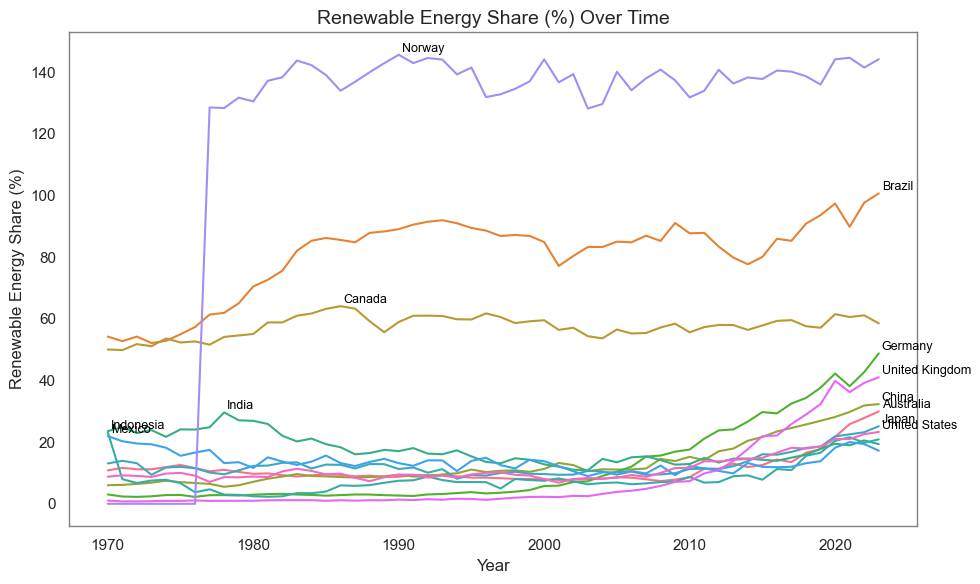

In [423]:
plt.figure(figsize=(10, 6))

sns.lineplot(
    data=df,
    x='Year',
    y='Renewable Energy Share',
    hue='Country',
    estimator=np.sum,
    ci=0
)

# Add labels at the highest point of each line
for country, group in df.groupby('Country'):
    max_row = group.loc[group['Renewable Energy Share'].idxmax()]
    plt.text(
        max_row['Year'] + 0.2,                        
        max_row['Renewable Energy Share'],             
        country, 
        fontsize=9, 
        color='black', 
        ha='left', 
        va='bottom'
    )

plt.legend([], [], frameon=False)
plt.title('Renewable Energy Share (%) Over Time', fontsize = 14)
plt.xlabel('Year')
plt.ylabel('Renewable Energy Share (%)')
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey')   
plt.tight_layout()
plt.show()

**Q2. Which renewable source (solar, wind, hydro, biofuel) grew the fastest?**

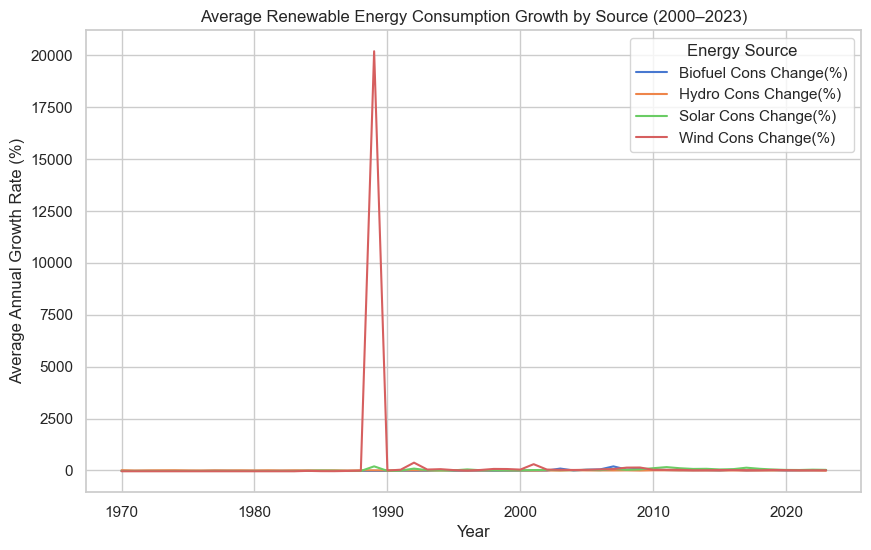

In [ ]:
# Group by year and get average change %
avg_growth = df.groupby('Year')[[
    'Biofuel Cons Change(%)',
    'Hydro Cons Change(%)',
    'Solar Cons Change(%)',
    'Wind Cons Change(%)'
]].mean().reset_index()

plt.figure(figsize=(10,6))
for col in ['Biofuel Cons Change(%)','Hydro Cons Change(%)','Solar Cons Change(%)','Wind Cons Change(%)']:
    plt.plot(avg_growth['Year'], avg_growth[col], label=col)

plt.title('Average Renewable Energy Consumption Growth by Source (2000–2023)')
plt.xlabel('Year')
plt.ylabel('Average Annual Growth Rate (%)')
plt.legend(title='Energy Source')
plt.grid(True)
plt.show()

**Q3. Did the growth in renewables replace or just add to fossil consumption?**

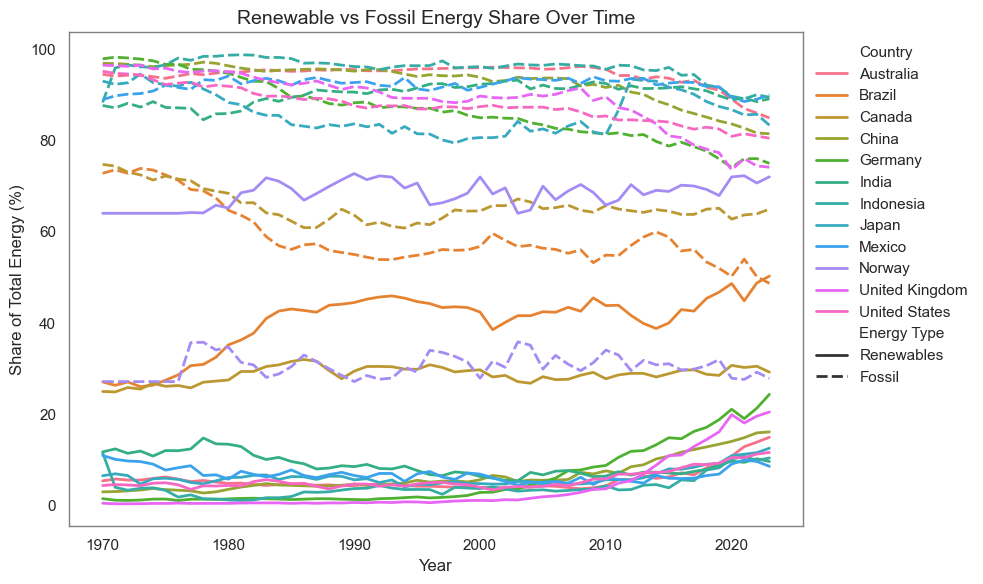

In [422]:
plt.figure(figsize=(10, 6))

# Melt data
df_melted = df.melt(
    id_vars=['Country', 'Year'],
    value_vars=['Renewables Share Energy', 'Fossil Share Energy'],
    var_name='Energy Type',
    value_name='Share'
)

df_melted['Energy Type'] = df_melted['Energy Type'].replace({
    'Renewables Share Energy': 'Renewables',
    'Fossil Share Energy': 'Fossil'
})

sns.lineplot(
    data=df_melted,
    x='Year',
    y='Share',
    hue='Country',
    style='Energy Type',
    linewidth=2
)

plt.title("Renewable vs Fossil Energy Share Over Time", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Share of Total Energy (%)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)

plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey')   
plt.tight_layout()
plt.show()

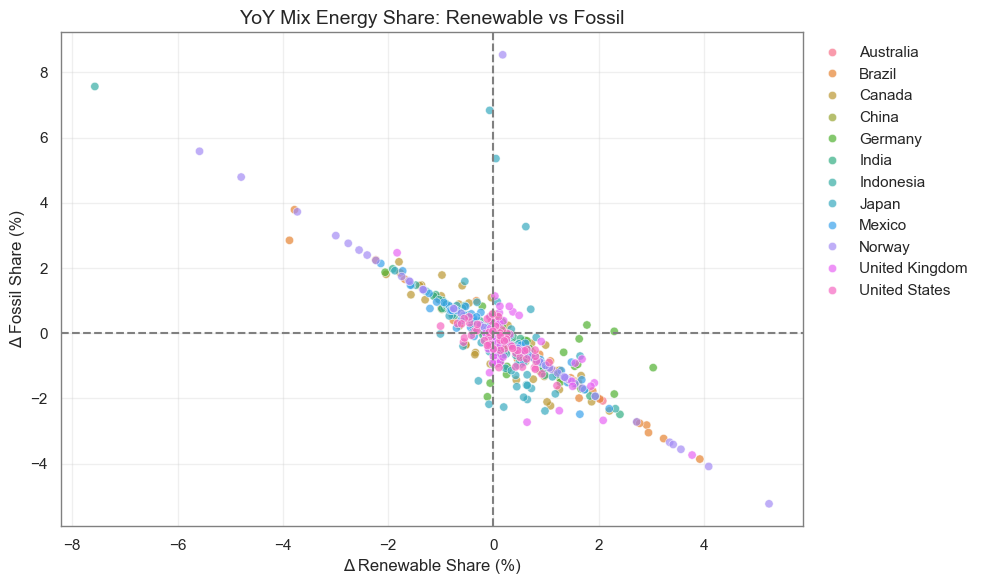

In [ ]:
# Calculate YoY change
df['Renewable Change'] = df.groupby('Country')['Renewables Share Energy'].diff()
df['Fossil Change'] = df.groupby('Country')['Fossil Share Energy'].diff()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='renewable_change',
    y='fossil_change',
    hue='Country',
    alpha=0.7
)

plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.title("YoY Mix Energy Share: Renewable vs Fossil", fontsize = 14)
plt.xlabel("Δ Renewable Share (%)")
plt.ylabel("Δ Fossil Share (%)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
plt.grid(True, alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()

In [407]:
continent_map = {
    'United States': 'North America',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'United Kingdom': 'Europe',
    'China': 'Asia',
    'India': 'Asia',
    'Japan': 'Asia',
    'Indonesia': 'Asia',
    'Australia': 'Oceania',
    'Brazil': 'South America',
    'Mexico': 'North America'
}
continent_palette = [
    '#25344F','#617891', '#80B9B1', '#94C7B4', '#C3C88C'
]

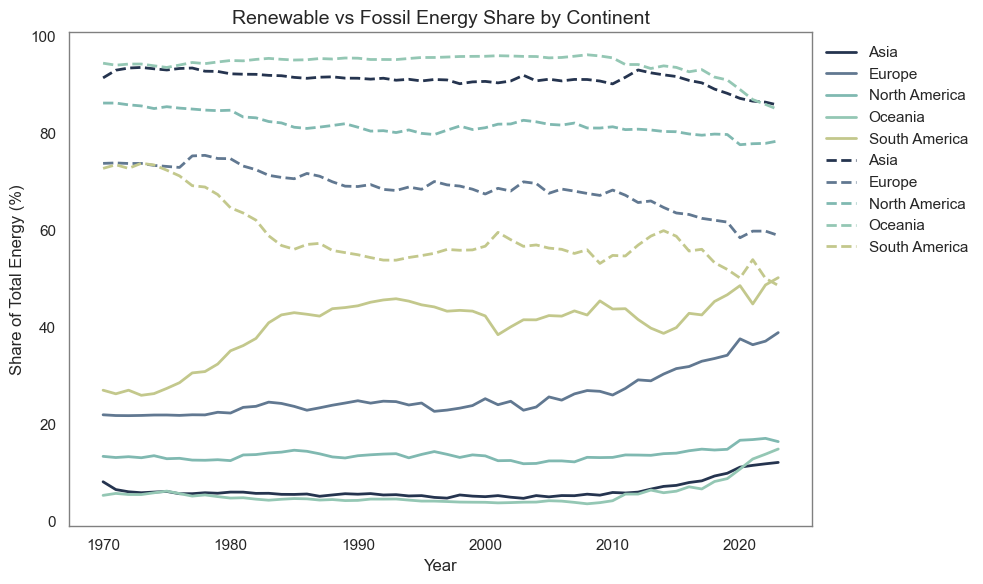

In [ ]:
df['Continent'] = df['Country'].map(continent_map)

continent_avg = df.groupby(['Continent', 'Year'])[['Renewables Share Energy', 'Fossil Share Energy']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=continent_avg, x='Year', y='Renewables Share Energy', hue='Continent', linewidth=2, palette = continent_palette)
sns.lineplot(data=continent_avg, x='Year', y='Fossil Share Energy', hue='Continent', linewidth=2, linestyle='--', palette = continent_palette)

plt.title("Renewable vs Fossil Energy Share by Continent", fontsize = 14)
plt.ylabel("Share of Total Energy (%)")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon = False)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()

## **CO₂ Reduction Effectiveness**

**Q4. Does increasing renewable energy effectively reduce CO₂ emissions per capita worldwide?**

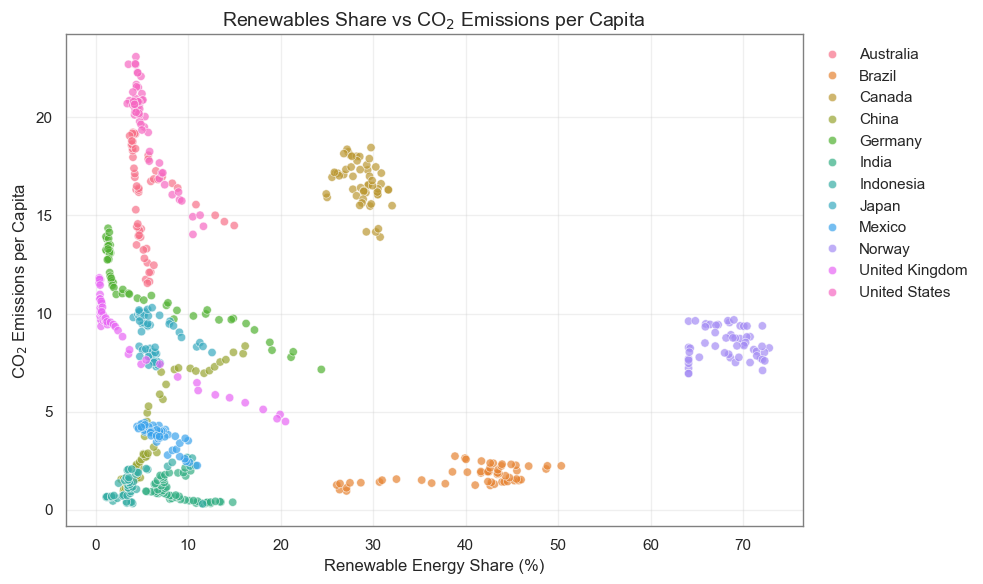

In [ ]:
df['CO2 Per_Capita'] = df['Annual CO2 Emission'] / df['Population']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Renewables Share Energy',
    y='CO2 Per_Capita',
    hue='Country',
    alpha=0.7
)

plt.title("Renewables Share vs CO$_2$ Emissions per Capita", fontsize = 14)
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("CO$_2$ Emissions per Capita")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon = False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()


In [415]:
df.head(0)

Empty DataFrame
Columns: [Country, Code, Year, Annual CO2 Emission, Population, GDP, Biofuel Consumption, Biofuel Cons Change(%), Biofuel Share Energy, Hydro Consumption, Hydro Cons Change(%), Hydro Share Energy, Solar Consumption, Solar Cons Change(%), Solar Share Energy, Wind Consumption, Wind Cons Change(%), Wind Share Energy, Renewables Consumption, Renewables Cons Change(%), Renewables Share Energy, Other Renewables Consumption, Other Renewables Cons Change(%), Other Renewables Share Energy, Coal Consumption, Coal Cons Change(%), Coal Share Energy, fossil_fuel_consumption, Fossil Cons Change(%), Fossil Share Energy, gas_consumption, gas_cons_change_pct, gas_share_energy, Oil Consumption, Oil Cons Change(%), Oil Share Energy, Renewable Energy Consumption, Renewable Energy Change Pct, Renewable Energy Share, Convention Energy Consumption, Convention Energy Change Pct, Convention Energy Share, renewable_change, fossil_change, Continent, CO2_per_capita, CO2_change_pct, GDP_change_pct, Growth_Category, renewables_share_lag1, renewables_share_lag3, renewables_share_lag5, Total Consumption, Renewable Change, Fossil Change, CO2 Per_Capita]
Index: []

<Figure size 1000x600 with 0 Axes>

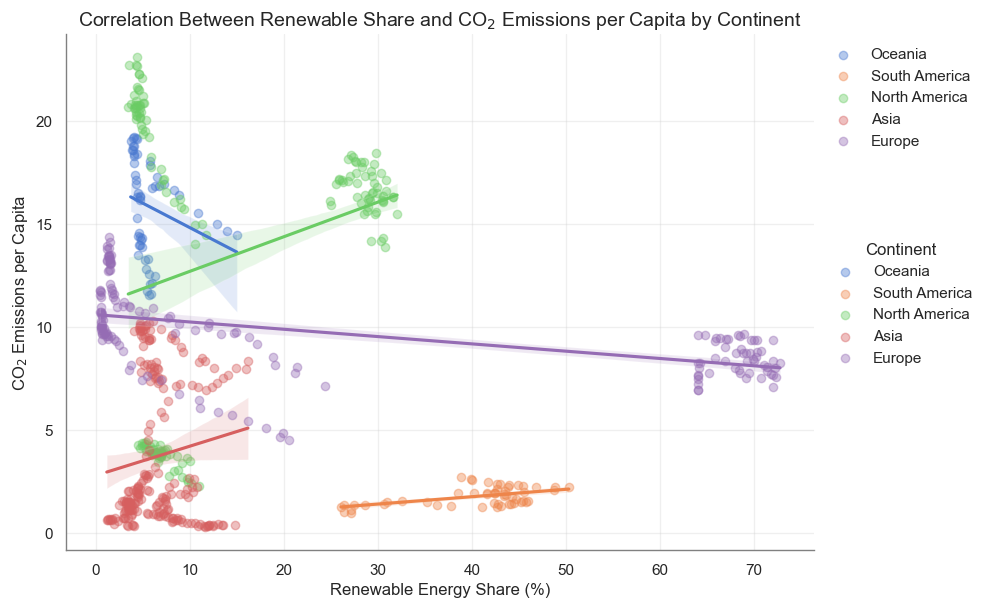

In [416]:
plt.figure(figsize=(10, 6))
sns.lmplot(
    data=df, 
    x='Renewables Share Energy', 
    y='CO2 Per_Capita',
    hue='Continent',
    aspect=1.4,
    height=6,
    scatter_kws={'alpha': 0.4}
)
plt.title("Correlation Between Renewable Share and CO$_2$ Emissions per Capita by Continent", fontsize = 14)
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("CO$_2$ Emissions per Capita")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon = False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.grid(True, alpha=0.3)
plt.show()


**Q5. Which countries have achieved absolute decoupling between GDP and CO₂ emissions (emissions decreased while GDP grew)?**

In [419]:
df = df.sort_values(by=['Country', 'Year'])
df['CO2 Change (%)'] = df.groupby('Country')['Annual CO2 Emission'].pct_change() * 100
df['GDP Change (%)'] = df.groupby('Country')['GDP'].pct_change() * 100

In [420]:
def classify_growth(row):
    if row['GDP Change (%)'] > 0 and row['CO2 Change (%)'] < 0:
        return 'Decoupled (GDP↑, CO₂↓)'
    elif row['GDP Change (%)'] > 0 and row['CO2 Change (%)'] > 0:
        return 'Coupled (GDP↑, CO₂↑)'
    elif row['GDP Change (%)'] < 0 and row['CO2 Change (%)'] < 0:
        return 'Both Decrease'
    else:
        return 'Reversed (GDP↓, CO₂↑)'

df['Growth Category'] = df.apply(classify_growth, axis=1)

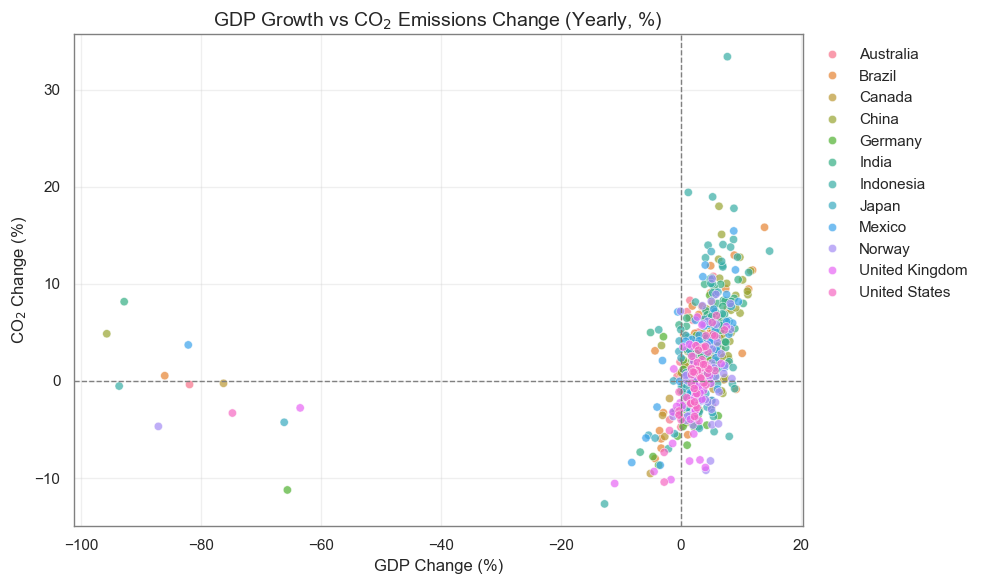

In [421]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='GDP Change (%)', y='CO2 Change (%)', hue='Country', alpha=0.7
)
plt.axhline(0, color='gray', linestyle='--', lw=1)
plt.axvline(0, color='gray', linestyle='--', lw=1)
plt.title("GDP Growth vs CO$_2$ Emissions Change (Yearly, %)" , fontsize = 14)
plt.xlabel("GDP Change (%)")
plt.ylabel("CO$_2$ Change (%)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon = False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()


In [309]:
df[df['GDP_change_pct'] < -60]

Entity Code  Year  Annual_CO2_emissions    population  \
53        Australia  AUS  2023          3.829720e+08  2.643911e+07   
107          Brazil  BRA  2023          4.864701e+08  2.164224e+08   
161          Canada  CAN  2023          5.492990e+08  3.878129e+07   
215           China  CHN  2023          1.190250e+10  1.425671e+09   
269         Germany  DEU  2023          5.961514e+08  8.329463e+07   
323           India  IND  2023          3.062324e+09  1.428628e+09   
377       Indonesia  IDN  2023          7.332239e+08  2.775341e+08   
431           Japan  JPN  2023          9.887847e+08  1.232945e+08   
485          Mexico  MEX  2023          4.826235e+08  1.284556e+08   
539          Norway  NOR  2023          3.890100e+07  5.474363e+06   
593  United Kingdom  GBR  2023          3.051463e+08  6.773680e+07   
647   United States  USA  2023          4.911391e+09  3.399966e+08   

              gdp  biofuel_consumption  biofuel_cons_change_pct  \
53   2.426446e+11                1.293                   -4.225   
107  4.434967e+11              266.070                    9.969   
161  4.177520e+11               33.713                   14.727   
215  1.144004e+12               30.818                    5.600   
269  1.343860e+12               36.176                    3.533   
323  7.487440e+11               34.337                   22.563   
377  2.208306e+11              112.376                   17.620   
431  1.615678e+12                4.971                   -1.407   
485  3.627236e+11                2.778                    2.022   
539  6.197226e+10                6.554                   64.176   
593  9.547564e+11               25.275                    9.815   
647  4.912636e+12              495.419                   13.215   

     biofuel_share_energy  hydro_consumption  hydro_cons_change_pct  \
53                  0.077             39.643                 -8.401   
107                 6.904           1113.496                  0.360   
161                 0.870            946.059                 -8.430   
215                 0.065           3184.722                 -5.556   
269                 1.141             51.015                 11.432   
323                 0.317            387.486                -14.730   
377                 4.002             63.877                 -9.910   
431                 0.103            193.524                 -0.493   
485                 0.118             52.991                -42.632   
539                 1.185            353.476                  6.633   
593                 1.309             13.494                 -7.901   
647                 1.892            613.883                 -5.951   

     hydro_share_energy  solar_consumption  solar_cons_change_pct  \
53                2.370            116.880                 19.844   
107              28.894            133.733                 70.887   
161              24.415             19.850                  8.387   
215               6.715           1517.424                 36.717   
269               1.610            159.018                  1.512   
323               3.575            294.599                 19.180   
377               2.275              1.852                 60.654   
431               4.003            251.957                  6.504   
485               2.257             70.509                 33.435   
539              63.910              1.339                 71.996   
593               0.699             35.917                  4.092   
647               2.344            624.803                 16.111   

     solar_share_energy  wind_consumption  wind_cons_change_pct  \
53                6.989            82.782                 6.049   
107               3.470           248.100                17.000   
161               0.512           101.143                 1.459   
215               3.199          2301.191                16.154   
269               5.017           369.136                13.850   
323   

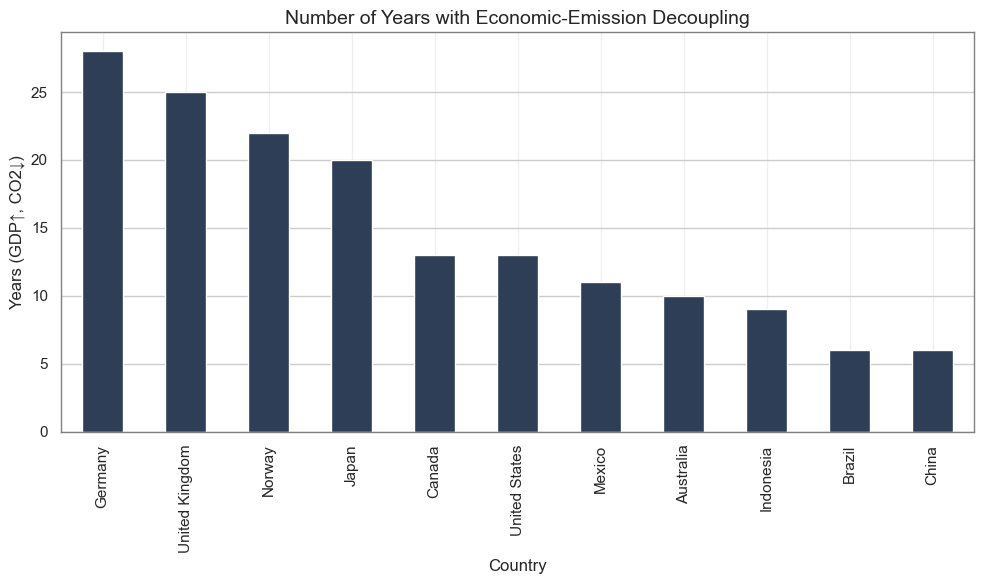

In [430]:
decoupling_count = df[df['Growth Category'] == 'Decoupled (GDP↑, CO₂↓)'].groupby('Country').size().sort_values(ascending=False)

plt.figure(figsize=(10,6))
decoupling_count.plot(kind='bar', color='#2D3E56')
plt.title("Number of Years with Economic-Emission Decoupling", fontsize = 14)
plt.ylabel("Years (GDP↑, CO2↓)")
plt.grid(axis='x', alpha=0.3)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()

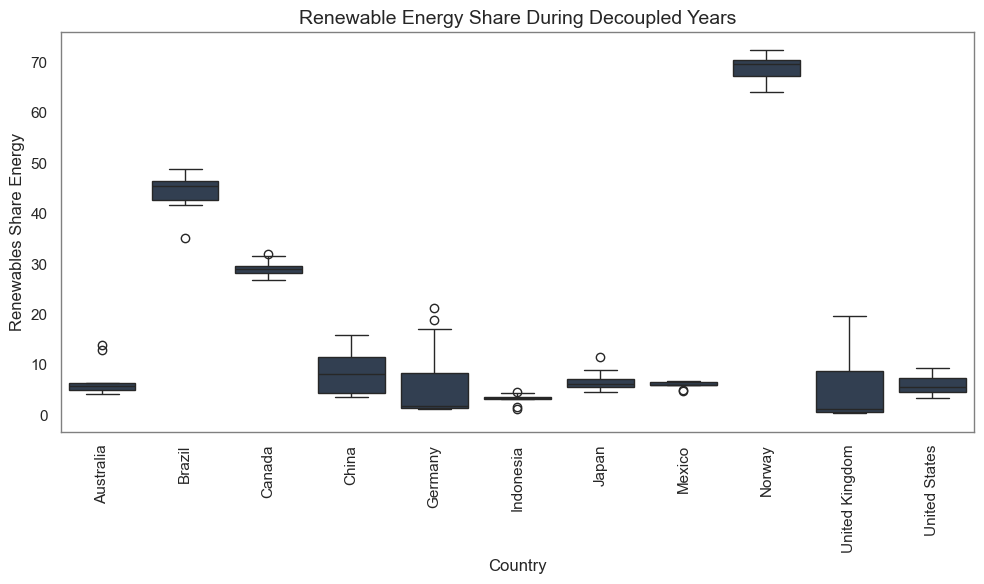

In [432]:
decoupled = df[df['Growth_Category'] == 'Decoupled (GDP↑, CO₂↓)']

plt.figure(figsize=(10,6))
sns.boxplot(data=decoupled, x='Country', y='Renewables Share Energy', color='#2D3E56')
plt.xticks(rotation=90)
plt.title("Renewable Energy Share During Decoupled Years", fontsize = 14)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()

**Q6. How does energy productivity differ between developed and developing economies?**

## **Energy Transition Efficiency**
Measure the efficiency of transition per unit of economic and population growth.

**Q6. How does energy productivity differ between developed and developing economies?**

In [220]:
df['Total Consumption'] = df['Renewable Energy Consumption'] + df['Convention Energy Consumption']

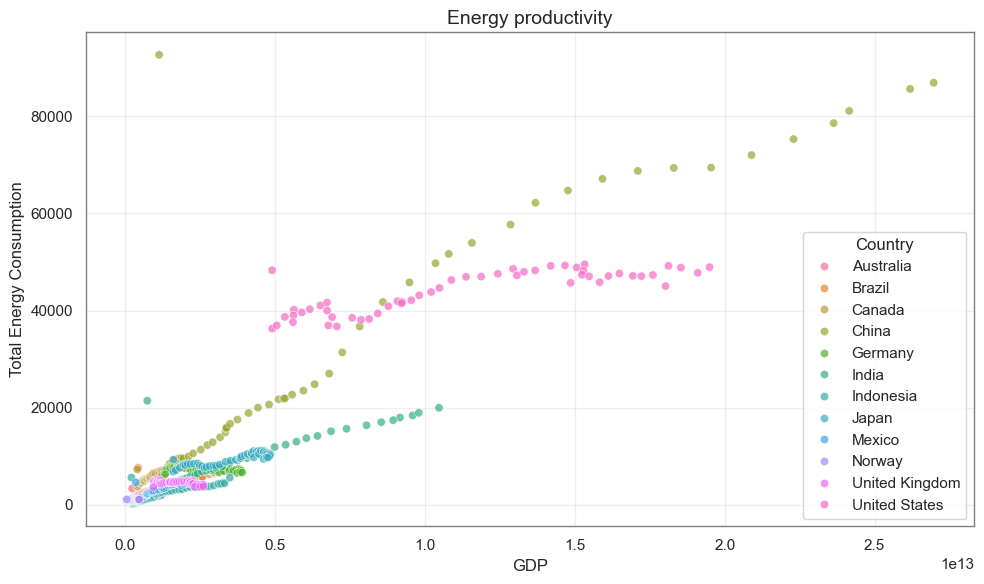

In [436]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='GDP', y='Total Consumption', hue='Country', alpha=0.7
)
plt.title("Energy productivity", fontsize = 14)
plt.xlabel("GDP")
plt.ylabel("Total Energy Consumption")
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


**Q7. How does emission intensity differ between high-income and middle-income countries?**

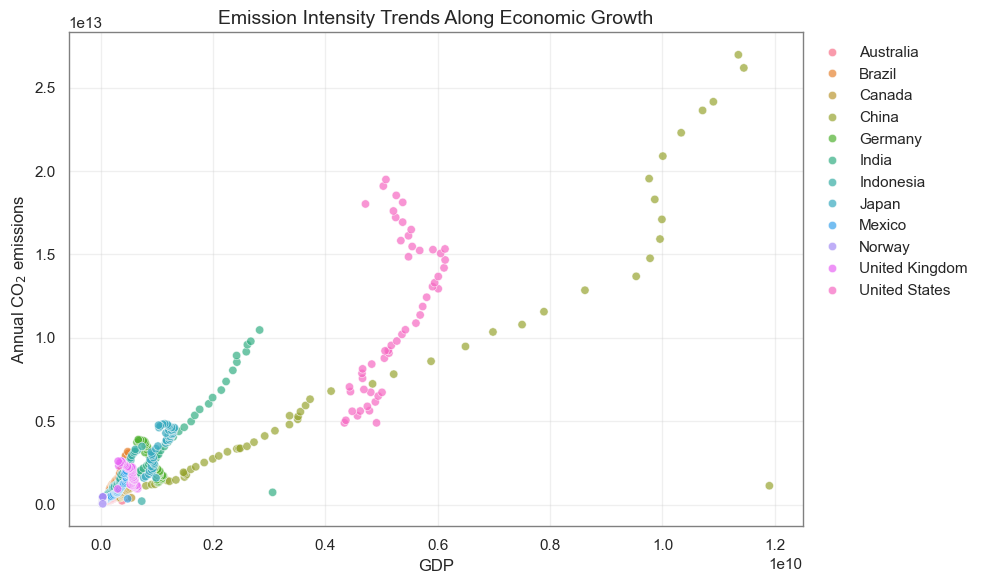

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Annual CO2 Emission', y='GDP', hue='Country', alpha=0.7
)
plt.title("Emission Intensity Trends Along Economic Growth", fontsize = 14)
plt.xlabel("GDP")
plt.ylabel("Annual CO$_2$ emissions")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon = False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()


**Q8. Renewable transition ratio: renewables_share_energy / fossil_share_energy**

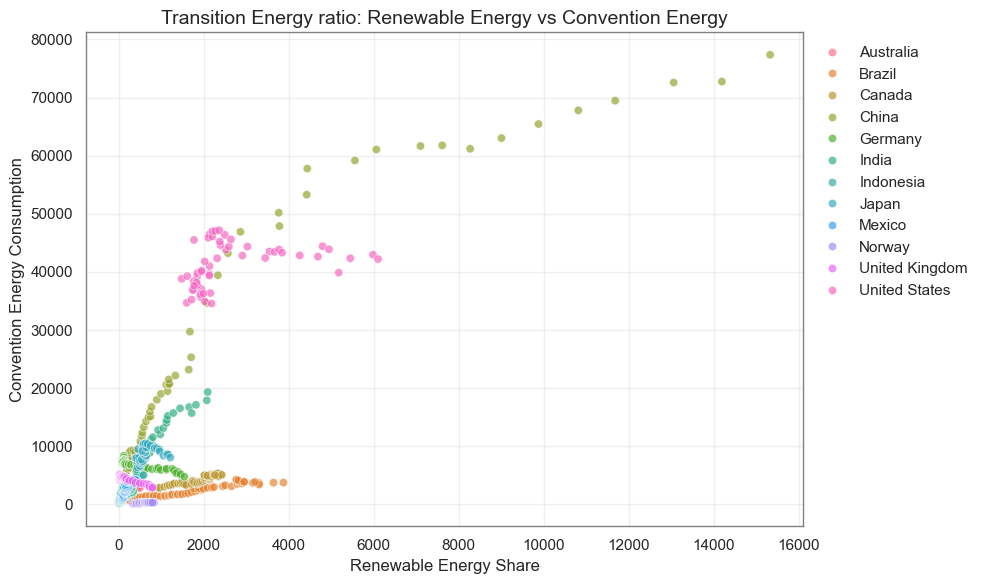

In [442]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, x='Renewable Energy Consumption', y='Convention Energy Consumption', hue='Country', alpha=0.7
)
plt.title("Transition Energy ratio: Renewable Energy vs Convention Energy", fontsize = 14)
plt.xlabel("Renewable Energy Share")
plt.ylabel("Convention Energy Consumption")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon = False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()


## **Source-Specific Impact**

**Q9. Which renewable energy source shows the strongest negative relation to CO₂?**

In [461]:
share_cols = [
    'Biofuel Share Energy',
    'Hydro Share Energy',
    'Solar Share Energy',
    'Wind Share Energy',
    'Renewables Share Energy',
    'Fossil Share Energy',
    'Coal Share Energy',
    'Gas Share Energy',
    'Oil Share Energy'
]

In [462]:
corr_df = df[share_cols + ['Annual CO2 Emission', 'CO2 Per_Capita']].corr()
corr_with_CO2 = corr_df[['Annual CO2 Emission', 'CO2 Per_Capita']].sort_values(by='Annual CO2 Emission', ascending=True)
corr_with_CO2

Annual CO2 Emission  CO2 Per_Capita
Oil Share Energy                   -0.267629       -0.143335
Hydro Share Energy                 -0.255583       -0.040170
Renewables Share Energy            -0.246789       -0.059543
Biofuel Share Energy               -0.076295       -0.239460
Gas Share Energy                   -0.017175        0.355520
Wind Share Energy                   0.084440        0.008867
Solar Share Energy                  0.094846        0.033646
Fossil Share Energy                 0.218990       -0.028321
CO2 Per_Capita                      0.268493        1.000000
Coal Share Energy                   0.391268       -0.103561
Annual CO2 Emission                 1.000000        0.268493

In [482]:
from matplotlib.colors import LinearSegmentedColormap
colors = ["#2D3E56", "#C8C3D6", "#45304D"]  # deep blue → pastel mix → deep purple
custom_cmap = LinearSegmentedColormap.from_list("cool_purple", colors, N=256)
palette = sns.color_palette(custom_cmap(np.linspace(0, 1, len(co2_corr))))

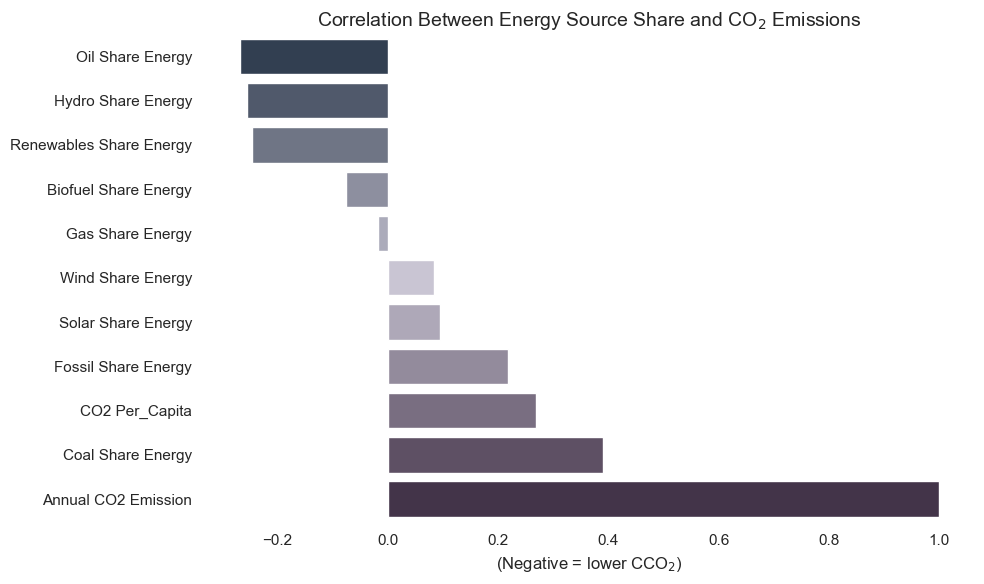

In [485]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=co2_corr.values,
    y=co2_corr.index,
    palette=palette
)

plt.title("Correlation Between Energy Source Share and CO$_2$ Emissions", fontsize=14, )
plt.xlabel("(Negative = lower CCO$_2$)")
plt.ylabel(None)

sns.despine(left=True, bottom=True)
plt.grid(False)
plt.tick_params(width=1.2)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()
plt.show()

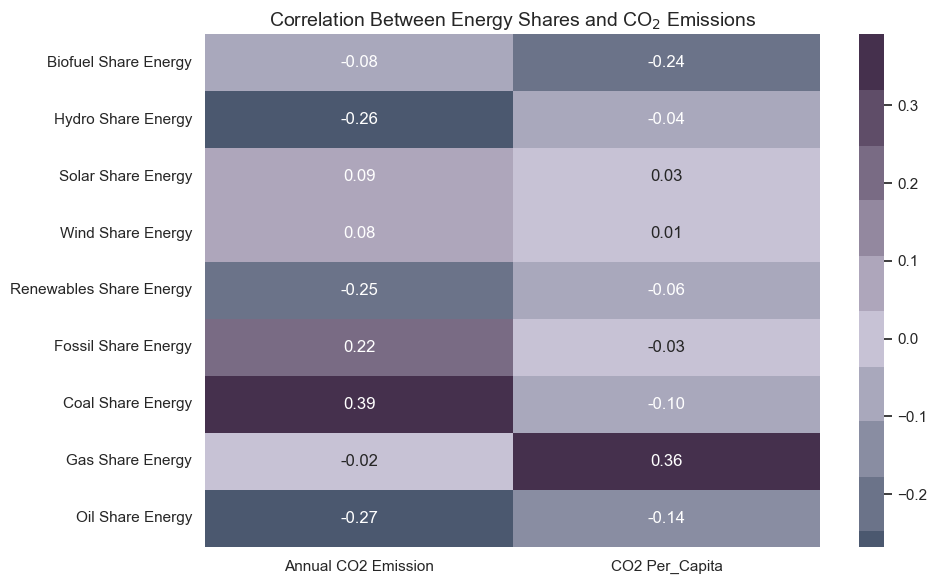

In [487]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    corr_df.loc[share_cols, ['Annual CO2 Emission', 'CO2 Per_Capita']],
    annot=True, cmap=palette, center=0, fmt=".2f"
)
plt.title("Correlation Between Energy Shares and CO$_2$ Emissions", fontsize = 14)
plt.tight_layout()
plt.show()

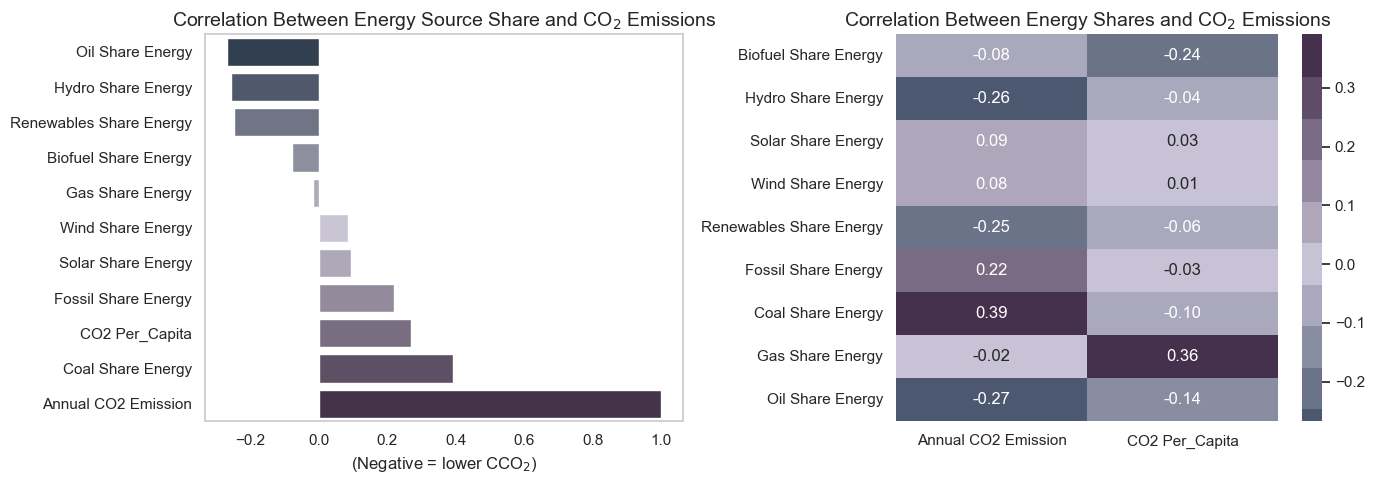

In [490]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Left Barplot
sns.barplot(
    x=co2_corr.values,
    y=co2_corr.index,
    palette=palette,
    ax=axes[0]
)
axes[0].set_title("Correlation Between Energy Source Share and CO$_2$ Emissions", fontsize=14)
axes[0].set_xlabel("(Negative = lower CCO$_2$)")
axes[0].set_ylabel(None)
axes[0].grid(False)

# Right Heatmap
sns.heatmap(
    corr_df.loc[share_cols, ['Annual CO2 Emission', 'CO2 Per_Capita']],
    annot=True,
    cmap=palette,
    center=0,
    fmt=".2f",
    ax=axes[1]
)
axes[1].set_title("Correlation Between Energy Shares and CO$_2$ Emissions", fontsize = 14)

# --- Adjust layout for neat spacing ---
plt.tight_layout()
plt.show()

## **Country Cluster & Characteristics**

Clustering based on: renewables_share_energy, fossil_share_energy, Annual_CO2_emissions per capita, GDP.

In [491]:
df.head(0)

Empty DataFrame
Columns: [Country, Code, Year, Annual CO2 Emission, Population, GDP, Biofuel Consumption, Biofuel Cons Change(%), Biofuel Share Energy, Hydro Consumption, Hydro Cons Change(%), Hydro Share Energy, Solar Consumption, Solar Cons Change(%), Solar Share Energy, Wind Consumption, Wind Cons Change(%), Wind Share Energy, Renewables Consumption, Renewables Cons Change(%), Renewables Share Energy, Other Renewables Consumption, Other Renewables Cons Change(%), Other Renewables Share Energy, Coal Consumption, Coal Cons Change(%), Coal Share Energy, Fossil Consumption, Fossil Cons Change(%), Fossil Share Energy, Gas Consumption, Gas Cons Change(%), Gas Share Energy, Oil Consumption, Oil Cons Change(%), Oil Share Energy, Renewable Energy Consumption, Renewable Energy Change Pct, Renewable Energy Share, Convention Energy Consumption, Convention Energy Change Pct, Convention Energy Share, renewable_change, fossil_change, Continent, CO2_per_capita, CO2_change_pct, GDP_change_pct, Growth_Category, renewables_share_lag1, renewables_share_lag3, renewables_share_lag5, Total Consumption, Renewable Change, Fossil Change, CO2 Per_Capita, CO2 Change (%), GDP Change (%), Growth Category, Renewables Share Lag1, Renewables Share Lag3, Renewables Share Lag5, GDP Per_Capita]
Index: []

In [492]:
# Latest available year
latest_year = df.groupby('Country')['Year'].max().reset_index()
latest_df = df.merge(latest_year, on=['Country', 'Year'])

# Select relevant columns
cluster_vars = [
    'Country',
    'Renewables Share Energy',
    'Fossil Share Energy',
    'CO2 Per_Capita',
    'GDP'
]
cluster_df = latest_df[cluster_vars].dropna()

In [493]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(cluster_df[['Renewables Share Energy', 'Fossil Share Energy', 'CO2 Per_Capita', 'GDP']])

In [494]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_df['Cluster'] = kmeans.fit_predict(X_scaled)

In [495]:
cluster_summary = cluster_df.groupby('Cluster')[['Renewables Share Energy', 'Fossil Share Energy', 'CO2 Per_Capita', 'GDP']].mean().round(2)
cluster_summary

Renewables Share Energy  Fossil Share Energy  CO2 Per_Capita  \
Cluster                                                                 
0                          16.29                81.46            7.25   
1                          61.21                38.32            4.68   
2                          11.66                80.58           14.45   

                  GDP  
Cluster                
0        7.834437e+11  
1        2.527345e+11  
2        4.912636e+12

In [496]:
def label_cluster(row):
    if row['Renewables Share Energy'] < 20 and row['Fossil Share Energy'] > 70:
        return "Fossil Heavy & Emission Growing"
    elif 20 <= row['Renewables Share Energy'] < 50:
        return "Balanced Transition"
    else:
        return "Renewable Leaders & Decoupled Growth"

cluster_df['Characteristics'] = cluster_df.apply(label_cluster, axis=1)


In [498]:
for Characteristics, subset in cluster_df.groupby('Characteristics'):
    print(f"\n🔹 {Characteristics}:")
    print(subset['Country'].head(10).to_list())



🔹 Balanced Transition:
['Canada', 'Germany', 'United Kingdom']

🔹 Fossil Heavy & Emission Growing:
['Australia', 'China', 'India', 'Indonesia', 'Japan', 'Mexico', 'United States']

🔹 Renewable Leaders & Decoupled Growth:
['Brazil', 'Norway']


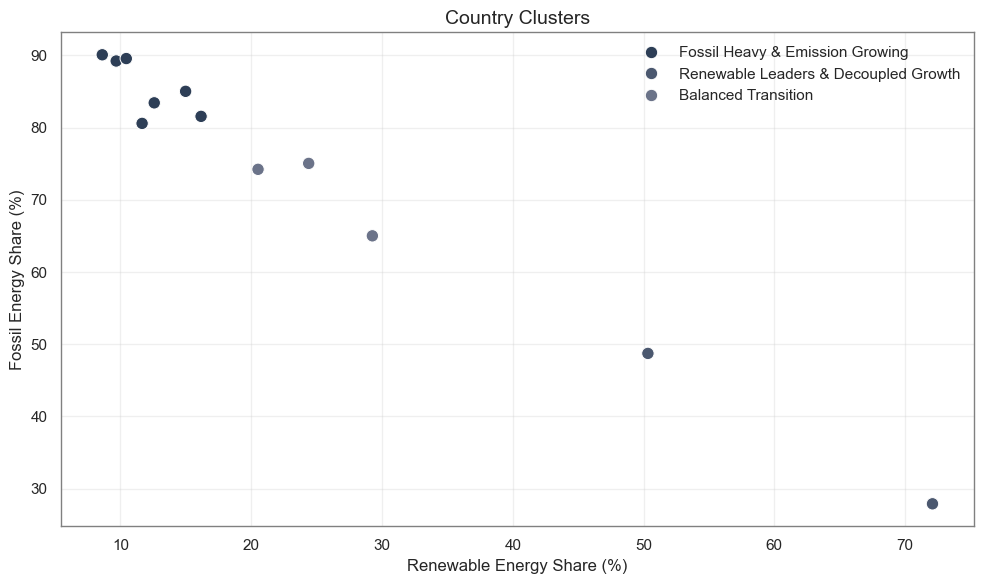

In [502]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=cluster_df,
    x='Renewables Share Energy',
    y='Fossil Share Energy',
    hue='Characteristics',
    palette=palette,
    s=80
)
plt.title("Country Clusters", fontsize = 14)
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Fossil Energy Share (%)")
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1, 1), frameon = False)
for spine in plt.gca().spines.values():
    spine.set_linewidth(1.0)   
    spine.set_color('grey') 
plt.tight_layout()


In [ ]:
import plotly.express as px

fig = px.scatter(
    df[df['Country'].isin(countries)],
    x="GDP", 
    y="Annual CO2 Emission",
    size="Renewables Share Energy",
    color="Country",
    animation_frame="Year",
    hover_name="Country",
    size_max=60,
    log_x=True, log_y=True,
    title="🌍 Decoupling Dashboard: GDP vs CO₂ over Time (2000–2023)",
    labels={
        "GDP": "GDP (log scale)",
        "Annual CO2 Emission": "CO₂ Emissions (log scale)",
        "Renewables Share Energy": "Renewable Energy Share (%)"
    }
)
fig.show()


In [534]:
df

Country      Continent Code  Year  Annual CO2 Emission  \
0        Australia        Oceania  AUS  1970         1.478610e+08   
1        Australia        Oceania  AUS  1971         1.511161e+08   
2        Australia        Oceania  AUS  1972         1.535983e+08   
3        Australia        Oceania  AUS  1973         1.701438e+08   
4        Australia        Oceania  AUS  1974         1.661827e+08   
..             ...            ...  ...   ...                  ...   
643  United States  North America  USA  2019         5.262145e+09   
644  United States  North America  USA  2020         4.714628e+09   
645  United States  North America  USA  2021         5.032213e+09   
646  United States  North America  USA  2022         5.078871e+09   
647  United States  North America  USA  2023         4.911391e+09   

      Population           GDP  Biofuel Consumption  Biofuel Cons Change(%)  \
0     12595038.0  2.426446e+11                0.000                 -22.239   
1     12993837.0  2.534398e+11                0.000                 -22.239   
2     13300319.0  2.605356e+11                0.000                 -22.239   
3     13513318.0  2.746595e+11                0.000                 -22.239   
4     13713392.0  2.814742e+11                0.000                 -22.239   
..           ...           ...                  ...                     ...   
643  334319680.0  1.854055e+13              415.870                   2.780   
644  335942016.0  1.802736e+13              378.321                  -9.029   
645  336997632.0  1.909938e+13              415.839                   9.917   
646  338289856.0  1.949317e+13              437.593                   5.231   
647  339996576.0  4.912636e+12              495.419                  13.215   

     Biofuel Share Energy  Hydro Consumption  Hydro Cons Change(%)  \
0                   0.000             30.075                17.118   
1                   0.000             34.027                13.143   
2                   0.000             34.163                 0.399   
3                   0.000             36.329                 6.340   
4                   0.000             41.025                12.926   
..                    ...                ...                   ...   
643                 1.565            752.485                -1.398   
644                 1.536            742.663                -0.941   
645                 1.602            651.455               -11.959   
646                 1.651            655.104                 0.928   
647                 1.892            613.883                -5.951   

     Hydro Share Energy  Solar Consumption  Solar Cons Change(%)  \
0                 5.275              0.000                 7.664   
1                 5.683              0.000                 7.664   
2                 5.457              0.000                 7.664   
3                 5.427              0.000                 7.664   
4                 5.763              0.000                 7.664   
..                  ...                ...                   ...   
643               2.831            284.616                14.490   
644               3.016            346.779                22.290   
645               2.510            434.585                25.781   
646               2.472            540.069                24.727   
647               2.344            624.803                16.111   

     Solar Share Energy  Wind Consumption  Wind Cons Change(%)  \
0                 0.000             0.000                0.000   
1                 0.000             0.000                0.000   
2                 0.000             0.000                0.000   
3                 0.000             0.000                0.000   
4                 0.000             0.000                0.000   
..                  ...               ...                  ...   
643               1.071           787.816                8.514   
644               1.408           896.488      

In [535]:
# Import data to excel
df.to_csv('Energy Mix and Carbon Emission.csv', index=False, encoding='utf-8')